In [1]:
import os
import json
import pandas as pd

# Base directory
base_directory = '/kaggle/input/arxive-ninety-thousand'

# CSV output file
csv_file_path = 'call_recordings.csv'

# Create CSV with headers
print(f"Creating CSV file: {csv_file_path}\n")
df_header = pd.DataFrame(columns=['ID', 'transcript'])
df_header.to_csv(csv_file_path, index=False)

print("Processing transcripts...\n")

i = 0
error_count = 0

for root, dirs, files in os.walk(base_directory):
    json_files = [f for f in files if f.endswith('.json')]
    
    for jsonfile in json_files:
        # FIX: Join root path with filename
        file_path = os.path.join(root, jsonfile)
        
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                fulltext = json.load(file)  
                text = fulltext.get("text") or fulltext.get("transcript") or str(fulltext)
            
            i += 1
            
            # Create dataframe row
            a = pd.DataFrame([[file_path, text]], columns=['ID', 'transcript'])
            a.to_csv(csv_file_path, mode='a', index=False, header=False)
            
            # Progress update
            if i % 500 == 0:
                print(f"✅ Processed {i:,} files...")
                
        except Exception as e:
            error_count += 1
            if error_count <= 10:
                print(f"❌ Error: {jsonfile}: {str(e)[:50]}")
            continue

print(f"\n{'='*60}")
print(f"✅ Total files processed: {i:,}")
print(f"❌ Errors encountered: {error_count:,}")
print(f"✅ Results saved to: {csv_file_path}")
print(f"{'='*60}")

# Show final result
df_final = pd.read_csv(csv_file_path)
print(f"\n📊 Total records: {len(df_final):,}")
print("\n📊 First 5 rows:")
print(df_final.head())

Creating CSV file: call_recordings.csv

Processing transcripts...

✅ Processed 500 files...
✅ Processed 1,000 files...
✅ Processed 1,500 files...
✅ Processed 2,000 files...
✅ Processed 2,500 files...
✅ Processed 3,000 files...
✅ Processed 3,500 files...
✅ Processed 4,000 files...
✅ Processed 4,500 files...
✅ Processed 5,000 files...
✅ Processed 5,500 files...
✅ Processed 6,000 files...
✅ Processed 6,500 files...
✅ Processed 7,000 files...
✅ Processed 7,500 files...
✅ Processed 8,000 files...
✅ Processed 8,500 files...
✅ Processed 9,000 files...
✅ Processed 9,500 files...
✅ Processed 10,000 files...
✅ Processed 10,500 files...
✅ Processed 11,000 files...
✅ Processed 11,500 files...
✅ Processed 12,000 files...
✅ Processed 12,500 files...
✅ Processed 13,000 files...
✅ Processed 13,500 files...
✅ Processed 14,000 files...
✅ Processed 14,500 files...
✅ Processed 15,000 files...
✅ Processed 15,500 files...
✅ Processed 16,000 files...
✅ Processed 16,500 files...
✅ Processed 17,000 files...
✅ 

In [2]:
pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# cleaning the data and removing the stopwords

In [3]:
import pandas as pd
import contractions
import re
from nltk.corpus import stopwords
import nltk

# Install contractions with a reliable PyPI mirror to avoid connection errors
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple/ contractions

# Download NLTK stopwords
nltk.download('stopwords')

# --- Step 1: Load and clean the data ---
file_path = '/kaggle/working/call_recordings.csv'  
df = pd.read_csv(file_path)

# Verify the columns
print("Columns in the dataset:", df.columns.tolist())


df['transcript'] = df['transcript'].fillna('')


def minimal_clean(text):
    """Minimal cleaning that preserves sentiment signals"""
    if not isinstance(text, str) or pd.isna(text):
        return ''
    
    # Expand contractions (I'm -> I am, won't -> will not)
    text = contractions.fix(text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    # Keep punctuation! Just remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s.,!?\'-]', '', text)
    
    return text  # NO STOPWORD REMOVAL!


# Apply cleaning to the transcript column
df['cleaned_transcript'] = df['transcript'].apply(minimal_clean)

# --- Step 2: Output the cleaned dataset ---
# Select only ID and cleaned_transcript for the final DataFrame
df_cleaned = df[['ID', 'cleaned_transcript']].copy()

# Display basic info
print("\nDataset info after cleaning:")
print(df_cleaned.info())
print("\nSample cleaned data:")
print(df_cleaned.head())

# Optionally save the cleaned dataset to a CSV file
output_path = '/kaggle/working/cleaned_transcripts.csv'
df_cleaned.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")



Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Columns in the dataset: ['ID', 'transcript']

Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95944 entries, 0 to 95943
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  95944 non-null  object
 1   cleaned_transcript  95944 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB
None

Sample cleaned data:
                                                  ID  \
0  /kaggle/input/arxive-ninety-thousand/medical_e...   
1  /kaggle/input/arxive-ninety-thousand/medical_e...   
2  /kaggle/input/arxive-ninety-thousand/medical_e...   
3  /kaggle/input/arxive-ninety-thousand/medical_e...   
4  /kaggle/input/arxive-ninety-thousand/medical_e...   

                                  cleaned_transcript  
0  Hello? Yes. Why did you hang up, sir? Pardon? ...  
1  Hello? Hello? Yes, hello, ma' am. Good afterno...  
2  Hello, good afternoon, this is PERSONNAME PERS...  
3

# classifiying the data

In [4]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    if not isinstance(text, str):
        return 'neutral'
    
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    
    if compound >= 0.2:
        return 'positive'
    elif compound <= -0.2:
        return 'negative'
    else:
        return 'neutral'

file_path = '/kaggle/working/cleaned_transcripts.csv'
df = pd.read_csv(file_path)

df['sentiment'] = df['cleaned_transcript'].apply(vader_sentiment)
df.to_csv('/kaggle/working/cleaned_transcripts_with_sentiment.csv', index=False)

print("✅ Sentiment column added successfully using VADER!")
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Sentiment column added successfully using VADER!
                                                  ID  \
0  /kaggle/input/arxive-ninety-thousand/medical_e...   
1  /kaggle/input/arxive-ninety-thousand/medical_e...   
2  /kaggle/input/arxive-ninety-thousand/medical_e...   
3  /kaggle/input/arxive-ninety-thousand/medical_e...   
4  /kaggle/input/arxive-ninety-thousand/medical_e...   

                                  cleaned_transcript sentiment  
0  Hello? Yes. Why did you hang up, sir? Pardon? ...  positive  
1  Hello? Hello? Yes, hello, ma' am. Good afterno...  positive  
2  Hello, good afternoon, this is PERSONNAME PERS...  positive  
3  Hello? Yes, Hello, PERSONNAME. I am so sorry f...  positive  
4  Hello? Hello, can you speak with PERSONNAME PE...  positive  


# creating balanced dataset

## 1-downsampling the positive

📊 ORIGINAL DISTRIBUTION:
sentiment
positive    95474
negative      450
neutral        20
Name: count, dtype: int64
Total samples: 95,944

📦 AVAILABLE SAMPLES:
Positive: 95,474
Negative: 450
Neutral: 20

✅ BALANCED TRAINING SET:
sentiment
positive    500
negative    450
neutral      20
Name: count, dtype: int64
Total training samples: 970


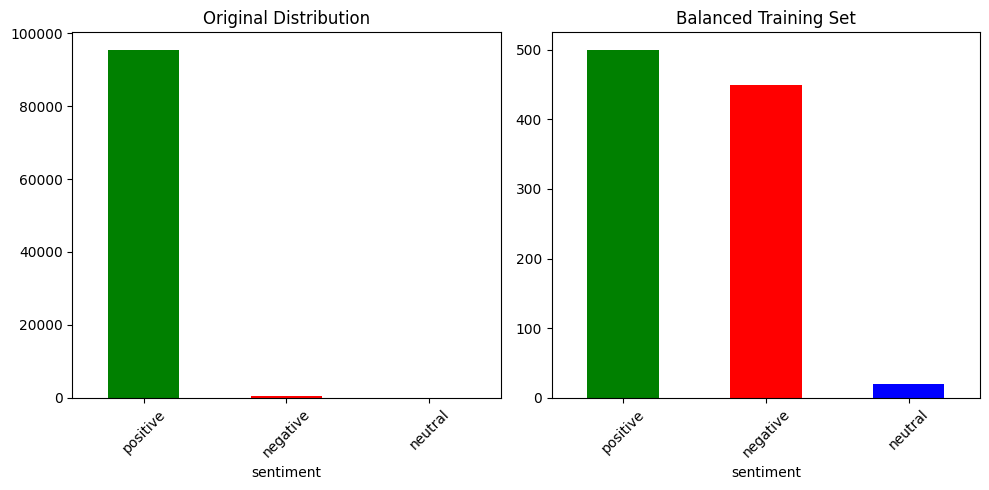

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt

print("📊 ORIGINAL DISTRIBUTION:")
print(df['sentiment'].value_counts())
print(f"Total samples: {len(df):,}")

# Create balanced dataset
def create_balanced_training_set(df, positive_samples=500, random_state=42):
    """
    Create a balanced training set with specified number of positive samples
    and all available negative/neutral samples
    """
    # Separate classes
    positive_df = df[df['sentiment'] == 'positive']
    negative_df = df[df['sentiment'] == 'negative']
    neutral_df = df[df['sentiment'] == 'neutral']
    
    print(f"\n📦 AVAILABLE SAMPLES:")
    print(f"Positive: {len(positive_df):,}")
    print(f"Negative: {len(negative_df):,}")
    print(f"Neutral: {len(neutral_df):,}")
    
    # Sample positive class
    positive_sampled = positive_df.sample(
        n=min(positive_samples, len(positive_df)), 
        random_state=random_state
    )
    
    # Use all negative and neutral samples
    negative_sampled = negative_df
    neutral_sampled = neutral_df
    
    # Combine into balanced dataset
    balanced_df = pd.concat([positive_sampled, negative_sampled, neutral_sampled], 
                           ignore_index=True)
    
    # Shuffle the dataset
    balanced_df = balanced_df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    return balanced_df

# Create balanced dataset
balanced_df = create_balanced_training_set(df, positive_samples=500)

print(f"\n✅ BALANCED TRAINING SET:")
print(balanced_df['sentiment'].value_counts())
print(f"Total training samples: {len(balanced_df):,}")

# Visualize the new distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Original Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
balanced_df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Balanced Training Set')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")
print("📊 EDA and Visualization Packages Loaded!")

📊 EDA and Visualization Packages Loaded!


In [7]:
print("🎯 BALANCED DATASET OVERVIEW")
print("=" * 60)
print(f"Dataset shape: {balanced_df.shape}")
print(f"Columns: {balanced_df.columns.tolist()}")
print(f"Missing values:\n{balanced_df.isnull().sum()}")


🎯 BALANCED DATASET OVERVIEW
Dataset shape: (970, 3)
Columns: ['ID', 'cleaned_transcript', 'sentiment']
Missing values:
ID                    0
cleaned_transcript    0
sentiment             0
dtype: int64


In [8]:
# 1. BASIC SENTIMENT DISTRIBUTION
print("\n📈 1. SENTIMENT DISTRIBUTION ANALYSIS")
print("=" * 50)

sentiment_counts = balanced_df['sentiment'].value_counts()
sentiment_percentages = balanced_df['sentiment'].value_counts(normalize=True) * 100

print("Sentiment Distribution in Balanced Dataset:")
for sentiment, count in sentiment_counts.items():
    percentage = sentiment_percentages[sentiment]
    print(f"  {sentiment.upper()}: {count:,} samples ({percentage:.1f}%)")


📈 1. SENTIMENT DISTRIBUTION ANALYSIS
Sentiment Distribution in Balanced Dataset:
  POSITIVE: 500 samples (51.5%)
  NEGATIVE: 450 samples (46.4%)
  NEUTRAL: 20 samples (2.1%)


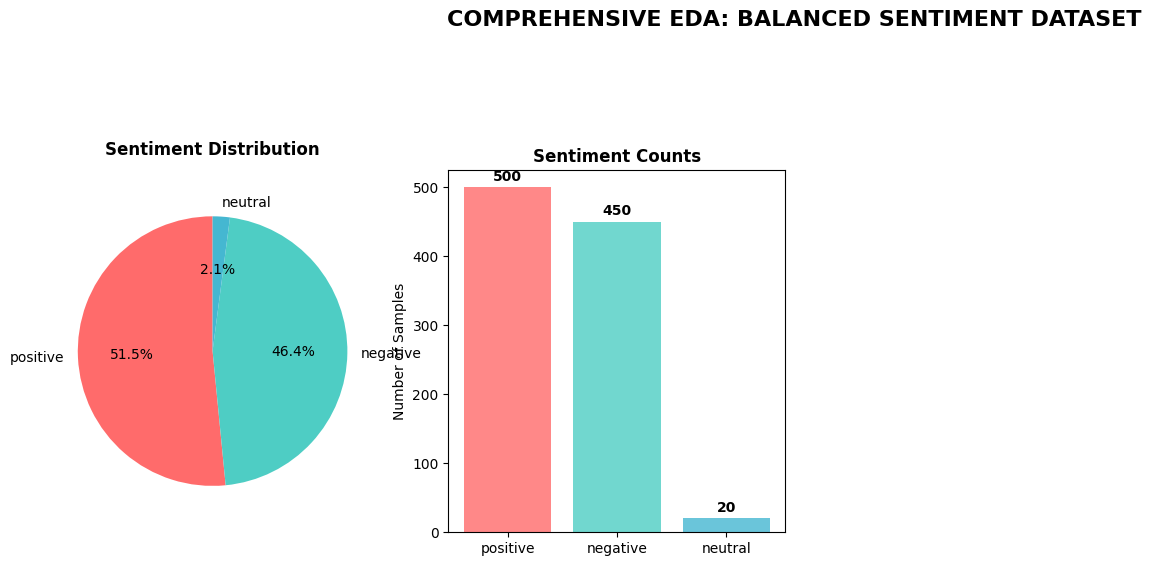

In [9]:
fig = plt.figure(figsize=(20, 16))
fig.suptitle('COMPREHENSIVE EDA: BALANCED SENTIMENT DATASET', fontsize=16, fontweight='bold')

# 1.1 Pie Chart - Sentiment Distribution
plt.subplot(3, 4, 1)
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']  # Red, Teal, Blue
wedges, texts, autotexts = plt.pie(sentiment_counts.values, labels=sentiment_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Sentiment Distribution', fontweight='bold', pad=20)
# 1.2 Bar Plot - Sentiment Counts
plt.subplot(3, 4, 2)
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors, alpha=0.8)
plt.title('Sentiment Counts', fontweight='bold')
plt.ylabel('Number of Samples')
for bar, count in zip(bars, sentiment_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}', ha='center', va='bottom', fontweight='bold')
    

In [10]:
# 2. TEXT LENGTH ANALYSIS
print("\n📏 2. TEXT LENGTH ANALYSIS")
print("=" * 50)

# Calculate text statistics
balanced_df['word_count'] = balanced_df['cleaned_transcript'].apply(lambda x: len(str(x).split()))
balanced_df['char_count'] = balanced_df['cleaned_transcript'].apply(lambda x: len(str(x)))
balanced_df['sentence_count'] = balanced_df['cleaned_transcript'].apply(lambda x: len(str(x).split('.')))

print("Text Length Statistics by Sentiment:")
length_stats = balanced_df.groupby('sentiment')['word_count'].agg(['mean', 'median', 'std', 'min', 'max'])
print(length_stats.round(2))




📏 2. TEXT LENGTH ANALYSIS
Text Length Statistics by Sentiment:
             mean  median     std  min   max
sentiment                                   
negative   729.13   566.5  609.07    5  8219
neutral    123.75    53.0  152.59    1   576
positive   734.00   586.5  534.19  103  4836


Text(0, 0.5, 'Number of Characters')

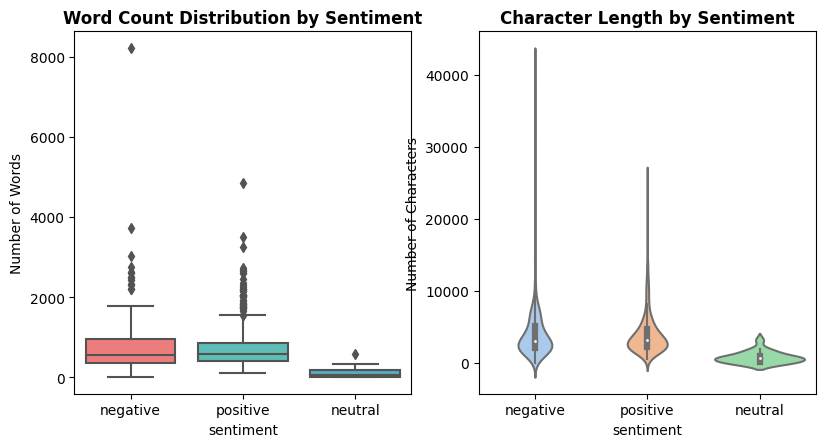

In [11]:
# 2.1 Box Plot - Word Count by Sentiment
fig = plt.figure(figsize=(20, 16))
plt.subplot(3, 4, 1)
sns.boxplot(data=balanced_df, x='sentiment', y='word_count', palette=colors)
plt.title('Word Count Distribution by Sentiment', fontweight='bold')
plt.ylabel('Number of Words')

# 2.2 Violin Plot - Character Count
plt.subplot(3, 4, 2)
sns.violinplot(data=balanced_df, x='sentiment', y='char_count', palette='pastel')
plt.title('Character Length by Sentiment', fontweight='bold')
plt.ylabel('Number of Characters')



🔤 3. TEXT COMPLEXITY ANALYSIS


Text(0, 0.5, 'Characters per Word')

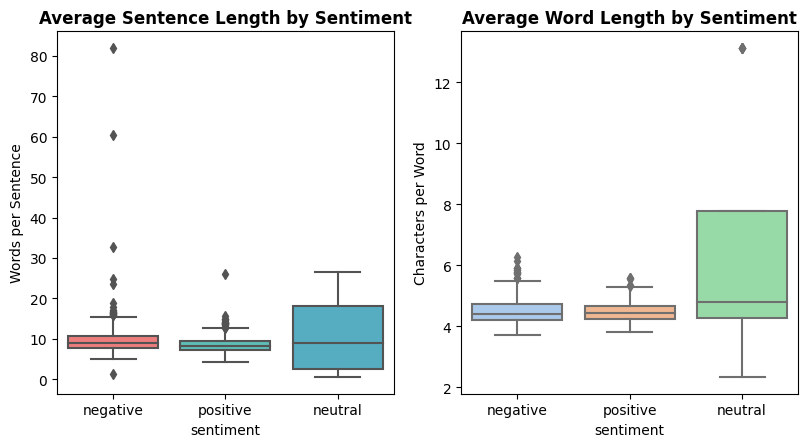

In [12]:
# 3. TEXT COMPLEXITY ANALYSIS
fig = plt.figure(figsize=(20, 16))
print("\n🔤 3. TEXT COMPLEXITY ANALYSIS")
print("=" * 50)

def calculate_readability_metrics(text):
    """Calculate basic readability metrics"""
    if not isinstance(text, str):
        return 0, 0
    
    words = text.split()
    sentences = text.split('.')
    
    if len(words) == 0 or len(sentences) == 0:
        return 0, 0
    
    avg_sentence_length = len(words) / len(sentences)
    avg_word_length = sum(len(word) for word in words) / len(words)
    
    return avg_sentence_length, avg_word_length

balanced_df[['avg_sentence_length', 'avg_word_length']] = balanced_df['cleaned_transcript'].apply(
    lambda x: pd.Series(calculate_readability_metrics(str(x)))
)

# 3.1 Average Sentence Length by Sentiment
plt.subplot(3, 4, 1)
sns.boxplot(data=balanced_df, x='sentiment', y='avg_sentence_length', palette=colors)
plt.title('Average Sentence Length by Sentiment', fontweight='bold')
plt.ylabel('Words per Sentence')

# 3.2 Average Word Length by Sentiment
plt.subplot(3, 4, 2)
sns.boxplot(data=balanced_df, x='sentiment', y='avg_word_length', palette='pastel')
plt.title('Average Word Length by Sentiment', fontweight='bold')
plt.ylabel('Characters per Word')


In [13]:
# Check what columns you actually have
print(df.columns)


Index(['ID', 'cleaned_transcript', 'sentiment'], dtype='object')


## 2. Add Negative Samples

In [14]:
# ================================
# 📦 1. Add Negative Samples
# ================================
!pip install vaderSentiment

import random
import pandas as pd

def add_negative_samples(df, n=200):
    """
    Create artificial negative samples by taking neutral examples
    and appending clearly negative words for balance.
    """
    negative_words = [
        "angry", "bad", "terrible", "disappointed", "frustrated",
        "upset", "horrible", "issue", "complaint", "problem", "poor", "rude"
    ]

    # Ensure lowercase sentiment for matching
    df["sentiment"] = df["sentiment"].str.lower()

    # Pick neutral samples (or positive if few neutral)
    neutral_subset = df[df["sentiment"] == "neutral"]
    if len(neutral_subset) < n:
        neutral_subset = df[df["sentiment"] == "positive"]

    # Sample and modify
    neutral_subset = neutral_subset.sample(min(n, len(neutral_subset)), random_state=42).copy()
    neutral_subset["cleaned_transcript"] = neutral_subset["cleaned_transcript"].apply(
        lambda x: x + " " + random.choice(negative_words)
    )
    neutral_subset["sentiment"] = "negative"

    # Combine with original
    df_aug = pd.concat([df, neutral_subset], ignore_index=True)
    print("✅ Added", len(neutral_subset), "synthetic negative samples.")
    print(df_aug["sentiment"].value_counts())
    return df_aug

df = add_negative_samples(df)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.4 MB/s eta 0:00:00
✅ Added 200 synthetic negative samples.
sentiment
positive    95474
negative      650
neutral        20
Name: count, dtype: int64


## 2. Improved Top 10 Words per Sentiment

In [15]:

# ================================
# 💬 2. Improved Top 10 Words per Sentiment
# ================================

import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_words(text, sentiment="pos"):
    words = [w for w in text.lower().split() if w.isalpha() and w not in stop_words]
    scored = {w: analyzer.polarity_scores(w)["compound"] for w in words}
    if sentiment == "pos":
        filtered = [w for w, s in scored.items() if s > 0.3]
    else:
        filtered = [w for w, s in scored.items() if s < -0.3]
    return filtered

# Combine text by sentiment
pos_text = " ".join(df[df["sentiment"] == "positive"]["cleaned_transcript"].tolist())
neg_text = " ".join(df[df["sentiment"] == "negative"]["cleaned_transcript"].tolist())

# Extract true sentiment words
pos_words = get_sentiment_words(pos_text, "pos")
neg_words = get_sentiment_words(neg_text, "neg")

# Count most frequent
pos_counts = Counter(pos_words).most_common(10)
neg_counts = Counter(neg_words).most_common(10)

# Convert to DataFrames for plotting
pos_df = pd.DataFrame(pos_counts, columns=["Word", "Count"])
neg_df = pd.DataFrame(neg_counts, columns=["Word", "Count"])

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Plot Top 10 Words

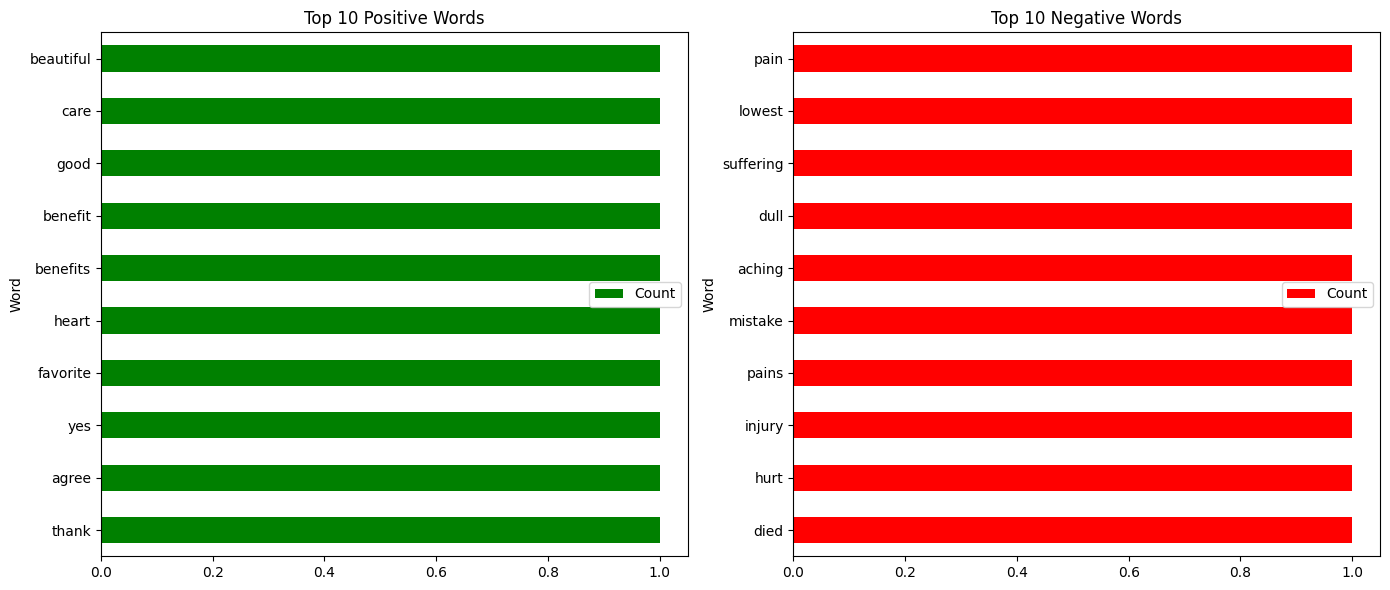

In [16]:
# ================================
# 📊 Plot Top 10 Words
# ================================

fig, ax = plt.subplots(1, 2, figsize=(14,6))

pos_df.plot.barh(x="Word", y="Count", color="green", ax=ax[0])
ax[0].set_title("Top 10 Positive Words")
ax[0].invert_yaxis()

neg_df.plot.barh(x="Word", y="Count", color="red", ax=ax[1])
ax[1].set_title("Top 10 Negative Words")
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [17]:


# 6.2 Interactive Scatter Plot: Word Count vs Character Count
fig_scatter = px.scatter(
    balanced_df, 
    x='word_count', 
    y='char_count', 
    color='sentiment',
    title='Word Count vs Character Count by Sentiment',
    color_discrete_map={'positive':'#4ecdc4', 'negative':'#ff6b6b', 'neutral':'#45b7d1'},
    hover_data=['cleaned_transcript']
)
fig_scatter.show()




📈 7. CORRELATION ANALYSIS


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



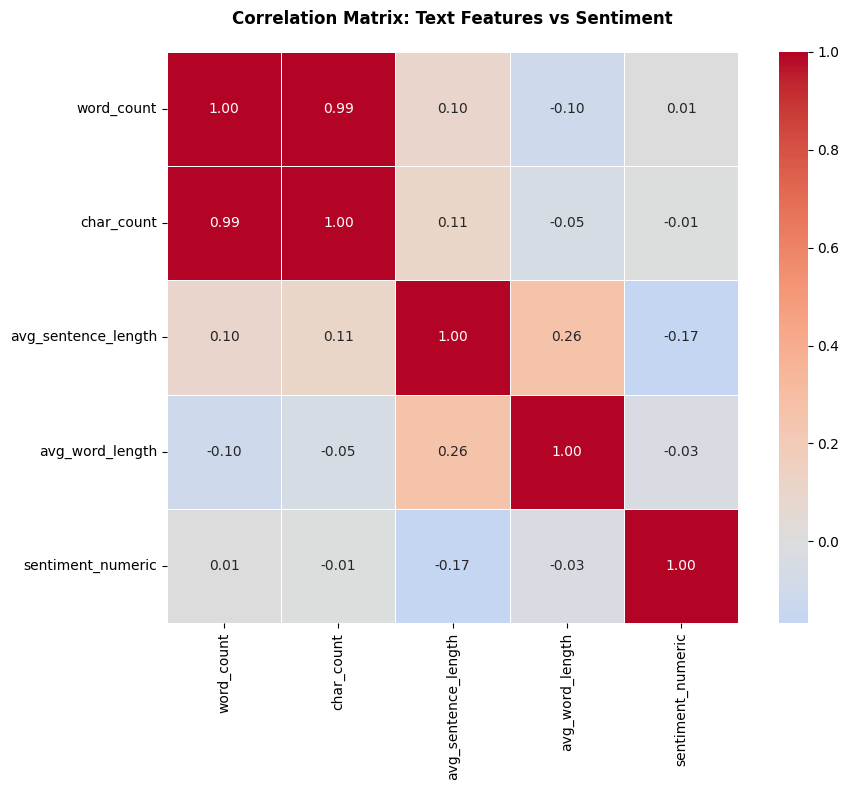

Correlation Matrix:
                     word_count  char_count  avg_sentence_length  \
word_count                1.000       0.992                0.098   
char_count                0.992       1.000                0.108   
avg_sentence_length       0.098       0.108                1.000   
avg_word_length          -0.103      -0.047                0.261   
sentiment_numeric         0.005      -0.005               -0.167   

                     avg_word_length  sentiment_numeric  
word_count                    -0.103              0.005  
char_count                    -0.047             -0.005  
avg_sentence_length            0.261             -0.167  
avg_word_length                1.000             -0.032  
sentiment_numeric             -0.032              1.000  


In [18]:
# 7. CORRELATION ANALYSIS
print("\n📈 7. CORRELATION ANALYSIS")
print("=" * 50)

# Create numerical representation for correlation
balanced_df['sentiment_numeric'] = balanced_df['sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})

# Calculate correlations
correlation_matrix = balanced_df[['word_count', 'char_count', 'avg_sentence_length', 'avg_word_length', 'sentiment_numeric']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix: Text Features vs Sentiment', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix.round(3))




📏 9. TEXT LENGTH COMPARISON


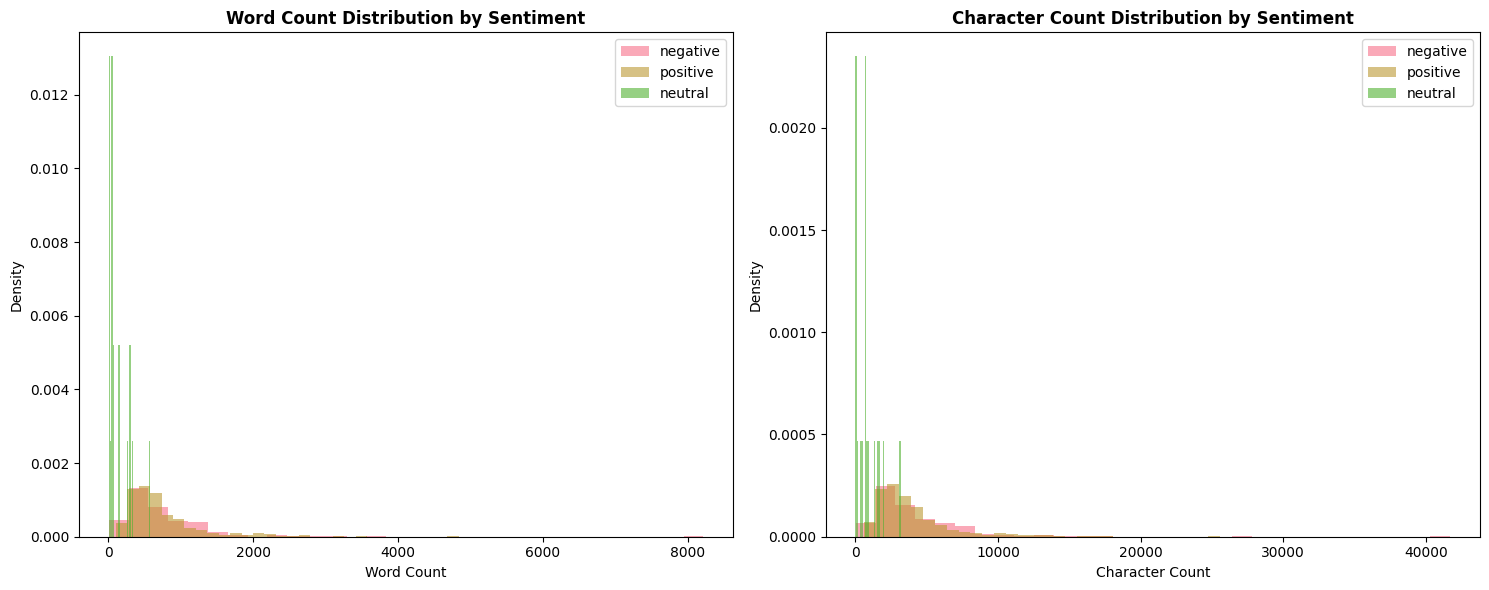

In [19]:
# 9. TEXT LENGTH DISTRIBUTION COMPARISON
print("\n📏 9. TEXT LENGTH COMPARISON")
print("=" * 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Word count distribution
for sentiment in balanced_df['sentiment'].unique():
    data = balanced_df[balanced_df['sentiment'] == sentiment]['word_count']
    ax1.hist(data, bins=30, alpha=0.6, label=sentiment, density=True)

ax1.set_xlabel('Word Count')
ax1.set_ylabel('Density')
ax1.set_title('Word Count Distribution by Sentiment', fontweight='bold')
ax1.legend()

# Character count distribution
for sentiment in balanced_df['sentiment'].unique():
    data = balanced_df[balanced_df['sentiment'] == sentiment]['char_count']
    ax2.hist(data, bins=30, alpha=0.6, label=sentiment, density=True)

ax2.set_xlabel('Character Count')
ax2.set_ylabel('Density')
ax2.set_title('Character Count Distribution by Sentiment', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()



In [20]:
# Save the enhanced balanced dataset with all new features
enhanced_balanced_path = '/kaggle/working/enhanced_balanced_sentiment_dataset.csv'
balanced_df.to_csv(enhanced_balanced_path, index=False)



In [21]:
balanced_df.head()

ID  \
0  /kaggle/input/arxive-ninety-thousand/medicare_...   
1  /kaggle/input/arxive-ninety-thousand/automotiv...   
2  /kaggle/input/arxive-ninety-thousand/medicare_...   
3  /kaggle/input/arxive-ninety-thousand/medicare_...   
4  /kaggle/input/arxive-ninety-thousand/medicare_...   

                                  cleaned_transcript sentiment  word_count  \
0  PERSONNAME. Thank you for calling ORGANIZATION...  negative         532   
1  ORGANIZATION ORGANIZATION ORGANIZATION. Hi, I ...  positive         399   
2  Hi, you have reached ORGANIZATION ORGANIZATION...  positive         408   
3  Thank you for calling ORGANIZATION ORGANIZATIO...  positive         314   
4  Thank you for calling ORGANIZATION ORGANIZATIO...  positive         538   

   char_count  sentence_count  avg_sentence_length  avg_word_length  \
0        2884              51            10.431373         4.422932   
1        1998              49             8.142857         4.010025   
2        2372              54             7.555556         4.816176   
3        1813              42             7.476190         4.777070   
4        3063              68             7.911765         4.695167   

   sentiment_numeric  
0                 -1  
1                  1  
2                  1  
3                  1  
4                  1

In [22]:
# 11. SUMMARY STATISTICS
print("\n📋 11. SUMMARY STATISTICS")
print("=" * 50)

print("Dataset Summary:")
print(f"Total samples: {len(balanced_df):,}")
print(f"Positive samples: {len(balanced_df[balanced_df['sentiment'] == 'positive']):,}")
print(f"Negative samples: {len(balanced_df[balanced_df['sentiment'] == 'negative']):,}")
print(f"Neutral samples: {len(balanced_df[balanced_df['sentiment'] == 'neutral']):,}")

print("\nText Statistics:")
print(f"Average word count: {balanced_df['word_count'].mean():.1f}")
print(f"Average character count: {balanced_df['char_count'].mean():.1f}")
print(f"Average sentence length: {balanced_df['avg_sentence_length'].mean():.1f} words")

print("\nSentiment-specific Text Lengths:")
for sentiment in balanced_df['sentiment'].unique():
    avg_words = balanced_df[balanced_df['sentiment'] == sentiment]['word_count'].mean()
    print(f"  {sentiment}: {avg_words:.1f} words on average")



📋 11. SUMMARY STATISTICS
Dataset Summary:
Total samples: 970
Positive samples: 500
Negative samples: 450
Neutral samples: 20

Text Statistics:
Average word count: 719.2
Average character count: 3939.2
Average sentence length: 9.2 words

Sentiment-specific Text Lengths:
  negative: 729.1 words on average
  positive: 734.0 words on average
  neutral: 123.8 words on average


#  Feature Engineering : Converting Text to Numerical Features

In [23]:
# ============================================
# CELL 1: IMPORT LIBRARIES AND SETUP
# ============================================
# This cell imports all necessary libraries for the ML pipeline
# Sets up warnings and prepares the environment for machine learning

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

print("🚀 COMPREHENSIVE SENTIMENT ANALYSIS ML PIPELINE")
print("=" * 60)

🚀 COMPREHENSIVE SENTIMENT ANALYSIS ML PIPELINE


In [24]:
# ============================================
# CELL 2: LOAD AND EXPLORE DATASET
# ============================================
# This cell loads the enhanced balanced dataset created in previous cells
# Provides overview of data shape, columns, and sentiment distribution
# Checks for missing values and data quality

print("\n📊 1. LOADING ENHANCED DATASET")
print("-" * 40)

# Load the enhanced balanced dataset
df = pd.read_csv('/kaggle/working/enhanced_balanced_sentiment_dataset.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nSentiment Distribution:")
print(df['sentiment'].value_counts())
print(f"\nMissing Values:\n{df.isnull().sum()}")

# Display sample data
print("\nSample Data:")
print(df.head(3))


📊 1. LOADING ENHANCED DATASET
----------------------------------------
Dataset Shape: (970, 9)
Columns: ['ID', 'cleaned_transcript', 'sentiment', 'word_count', 'char_count', 'sentence_count', 'avg_sentence_length', 'avg_word_length', 'sentiment_numeric']

Sentiment Distribution:
sentiment
positive    500
negative    450
neutral      20
Name: count, dtype: int64

Missing Values:
ID                     0
cleaned_transcript     0
sentiment              0
word_count             0
char_count             0
sentence_count         0
avg_sentence_length    0
avg_word_length        0
sentiment_numeric      0
dtype: int64

Sample Data:
                                                  ID  \
0  /kaggle/input/arxive-ninety-thousand/medicare_...   
1  /kaggle/input/arxive-ninety-thousand/automotiv...   
2  /kaggle/input/arxive-ninety-thousand/medicare_...   

                                  cleaned_transcript sentiment  word_count  \
0  PERSONNAME. Thank you for calling ORGANIZATION...  negative 

In [25]:
# ============================================
# CELL 3: PREPARE DATA FOR MODELING
# ============================================
# This cell separates text data and numerical features
# Prepares the target variable (sentiment labels)
# Shows class distribution and data overview

print("\n🎯 2. PREPARING DATA FOR MODELING")
print("-" * 40)

# Use cleaned transcript and additional features
X_text = df['cleaned_transcript']
y = df['sentiment']

# Additional numerical features
additional_features = df[['word_count', 'char_count', 'avg_sentence_length', 'avg_word_length']].values

print(f"Text samples: {len(X_text)}")
print(f"Additional features shape: {additional_features.shape}")
print(f"\nClass distribution:")
print(y.value_counts())

# Show sample text
print(f"\nSample text (first 200 chars):")
print(X_text.iloc[0][:200] + "...")


🎯 2. PREPARING DATA FOR MODELING
----------------------------------------
Text samples: 970
Additional features shape: (970, 4)

Class distribution:
sentiment
positive    500
negative    450
neutral      20
Name: count, dtype: int64

Sample text (first 200 chars):
PERSONNAME. Thank you for calling ORGANIZATION ORGANIZATION. This is also speaking. Who do I have the pleasure speaking with? My name is PERSONNAME PERSONNAME. Can I help you, Mr. PERSONNAME? Hi, I ju...


In [26]:
# ============================================
# CELL 4: ADVANCED FEATURE ENGINEERING
# ============================================
# This cell converts text to numerical features using TF-IDF
# Combines text features with existing numerical features
# Creates a comprehensive feature matrix for machine learning

print("\n🔧 3. ADVANCED FEATURE ENGINEERING")
print("-" * 40)

# TF-IDF Vectorization with optimized parameters
tfidf_vectorizer = TfidfVectorizer(
    max_features=8000,        # Increased for better performance
    min_df=2,                # Word must appear in at least 2 documents
    max_df=0.85,             # Ignore words appearing in >85% of documents
    ngram_range=(1, 3),      # Unigrams, bigrams, and trigrams
    strip_accents='unicode',
    lowercase=True,
    sublinear_tf=True,       # Apply sublinear scaling
    stop_words='english'
)

# Fit and transform text data
X_tfidf = tfidf_vectorizer.fit_transform(X_text)
print(f"✅ TF-IDF Matrix Shape: {X_tfidf.shape}")
print(f"📊 Sparsity: {(1.0 - X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1])) * 100:.2f}%")

# Convert sparse matrix to dense for combination
X_tfidf_dense = X_tfidf.toarray()

# Combine TF-IDF features with additional features
X_combined = np.hstack([X_tfidf_dense, additional_features])
print(f"🔗 Combined feature matrix shape: {X_combined.shape}")

# Show sample features
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\n🔤 Sample TF-IDF features: {list(feature_names[:20])}")


🔧 3. ADVANCED FEATURE ENGINEERING
----------------------------------------
✅ TF-IDF Matrix Shape: (970, 8000)
📊 Sparsity: 97.08%
🔗 Combined feature matrix shape: (970, 8004)

🔤 Sample TF-IDF features: ['000', '000 miles', '10', '100', '100 sure', '12', '12 000', '12 000 miles', '12 coverage', '12 coverage protection', '15', '20', '25', '30', '40', '50', '500', '5150', '600', 'abandoned']


In [27]:
# ============================================
# CELL 5: LABEL ENCODING
# ============================================
# This cell converts text sentiment labels to numerical format
# Required for machine learning algorithms
# Shows the mapping between text and numerical labels

print("\n🏷️ 4. LABEL ENCODING")
print("-" * 40)

# Encode sentiment labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Label mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")
print(f"Encoded labels shape: {y_encoded.shape}")
print(f"Original labels: {label_encoder.classes_}")
print(f"Encoded labels: {np.unique(y_encoded)}")


🏷️ 4. LABEL ENCODING
----------------------------------------
Label mapping: {'negative': 0, 'neutral': 1, 'positive': 2}
Encoded labels shape: (970,)
Original labels: ['negative' 'neutral' 'positive']
Encoded labels: [0 1 2]


In [28]:
# ============================================
# CELL 6: TRAIN-TEST SPLIT
# ============================================
# This cell splits data into training and testing sets
# Maintains class distribution in both sets (stratified split)
# Prepares data for model training and evaluation

print("\n✂️ 5. TRAIN-TEST SPLIT")
print("-" * 40)

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded
)

print(f"Training samples: {X_train.shape[0]} ({X_train.shape[0]/len(X_combined)*100:.1f}%)")
print(f"Testing samples: {X_test.shape[0]} ({X_test.shape[0]/len(X_combined)*100:.1f}%)")
print(f"\nTraining set distribution: {np.bincount(y_train)}")
print(f"Test set distribution: {np.bincount(y_test)}")

# Verify stratified split
print(f"\nTraining class proportions:")
for i, class_name in enumerate(label_encoder.classes_):
    prop = np.bincount(y_train)[i] / len(y_train) * 100
    print(f"  {class_name}: {prop:.1f}%")


✂️ 5. TRAIN-TEST SPLIT
----------------------------------------
Training samples: 776 (80.0%)
Testing samples: 194 (20.0%)

Training set distribution: [360  16 400]
Test set distribution: [ 90   4 100]

Training class proportions:
  negative: 46.4%
  neutral: 2.1%
  positive: 51.5%


In [29]:
from sklearn.preprocessing import StandardScaler

print("\n⚙️ SCALING FEATURES FOR BETTER CONVERGENCE")
print("-" * 40)
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Features scaled successfully")



⚙️ SCALING FEATURES FOR BETTER CONVERGENCE
----------------------------------------
✅ Features scaled successfully


In [30]:
# ============================================
# CELL 7: TRAIN LOGISTIC REGRESSION MODEL
# ============================================
# This cell trains a Logistic Regression model
# Performs cross-validation for robust evaluation
# Calculates multiple performance metrics
print("\n📈 MODEL 1: LOGISTIC REGRESSION")
print("-" * 30)
lr_model = LogisticRegression(
    max_iter=500,  # Enough with scaling
    random_state=42,
    class_weight='balanced',
    solver='lbfgs',
    C=1.0,
    n_jobs=-1
)
print("Training Logistic Regression...")
lr_model.fit(X_train_scaled, y_train)  # Use scaled data
lr_pred = lr_model.predict(X_test_scaled)  # Use scaled data

lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=3, scoring='f1_weighted', n_jobs=-1)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')

print(f"✅ Accuracy: {lr_accuracy:.4f}")
print(f"📊 F1-Score: {lr_f1:.4f}")
print(f"🎯 Precision: {lr_precision:.4f}")
print(f"🔍 Recall: {lr_recall:.4f}")
print(f"🔄 CV F1-Score: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")

results = {}
results['Logistic Regression'] = {
    'accuracy': lr_accuracy,
    'f1_score': lr_f1,
    'precision': lr_precision,
    'recall': lr_recall,
    'cv_f1': lr_cv_scores.mean(),
    'predictions': lr_pred,
    'model': lr_model
}


📈 MODEL 1: LOGISTIC REGRESSION
------------------------------
Training Logistic Regression...
✅ Accuracy: 0.9124
📊 F1-Score: 0.9130
🎯 Precision: 0.9150
🔍 Recall: 0.9124
🔄 CV F1-Score: 0.8482 (+/- 0.0128)


In [31]:
print("\n📈 MODEL 2: NAIVE BAYES")
print("-" * 30)
nb_model = MultinomialNB(alpha=0.1)
print("Training Naive Bayes...")
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=3, scoring='f1_weighted', n_jobs=-1)

nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
nb_precision = precision_score(y_test, nb_pred, average='weighted')
nb_recall = recall_score(y_test, nb_pred, average='weighted')

print(f"✅ Accuracy: {nb_accuracy:.4f}")
print(f"📊 F1-Score: {nb_f1:.4f}")
print(f"🎯 Precision: {nb_precision:.4f}")
print(f"🔍 Recall: {nb_recall:.4f}")
print(f"🔄 CV F1-Score: {nb_cv_scores.mean():.4f} (+/- {nb_cv_scores.std() * 2:.4f})")

results['Naive Bayes'] = {
    'accuracy': nb_accuracy,
    'f1_score': nb_f1,
    'precision': nb_precision,
    'recall': nb_recall,
    'cv_f1': nb_cv_scores.mean(),
    'predictions': nb_pred,
    'model': nb_model
}


📈 MODEL 2: NAIVE BAYES
------------------------------
Training Naive Bayes...
✅ Accuracy: 0.8247
📊 F1-Score: 0.8238
🎯 Precision: 0.8281
🔍 Recall: 0.8247
🔄 CV F1-Score: 0.7893 (+/- 0.0325)


In [32]:
print("\n📈 MODEL 3: RANDOM FOREST (OPTIMIZED)")
print("-" * 30)
rf_model = RandomForestClassifier(
    n_estimators=100,  # Reduced from 200
    max_depth=15,  # Reduced from 25
    min_samples_split=10,  # Increased from 5
    min_samples_leaf=4,  # Increased from 2
    max_features='sqrt',  # Added for faster training
    random_state=42,
    class_weight='balanced',
    n_jobs=-1,
    max_samples=0.8  # Added: uses 80% of data per tree (faster)
)
print("Training Random Forest...")
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=3, scoring='f1_weighted', n_jobs=-1)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')

print(f"✅ Accuracy: {rf_accuracy:.4f}")
print(f"📊 F1-Score: {rf_f1:.4f}")
print(f"🎯 Precision: {rf_precision:.4f}")
print(f"🔍 Recall: {rf_recall:.4f}")
print(f"🔄 CV F1-Score: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

results['Random Forest'] = {
    'accuracy': rf_accuracy,
    'f1_score': rf_f1,
    'precision': rf_precision,
    'recall': rf_recall,
    'cv_f1': rf_cv_scores.mean(),
    'predictions': rf_pred,
    'model': rf_model
}


📈 MODEL 3: RANDOM FOREST (OPTIMIZED)
------------------------------
Training Random Forest...
✅ Accuracy: 0.8918
📊 F1-Score: 0.8924
🎯 Precision: 0.8984
🔍 Recall: 0.8918
🔄 CV F1-Score: 0.8661 (+/- 0.0629)


In [33]:
print("\n📈 MODEL 4: SUPPORT VECTOR MACHINE (OPTIMIZED)")
print("-" * 30)

# Use LinearSVC instead of SVC with RBF kernel - MUCH FASTER!
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svm_base = LinearSVC(
    C=1.0,
    class_weight='balanced',
    random_state=42,
    max_iter=1000,
    dual=False  # Faster when n_samples > n_features
)

# Wrap with calibration for probability estimates
svm_model = CalibratedClassifierCV(svm_base, cv=3)

print("Training SVM...")
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Skip CV for SVM to save time (already using calibration CV)
print("⏩ Skipping separate CV (using calibration CV)")

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')

print(f"✅ Accuracy: {svm_accuracy:.4f}")
print(f"📊 F1-Score: {svm_f1:.4f}")
print(f"🎯 Precision: {svm_precision:.4f}")
print(f"🔍 Recall: {svm_recall:.4f}")

results['SVM'] = {
    'accuracy': svm_accuracy,
    'f1_score': svm_f1,
    'precision': svm_precision,
    'recall': svm_recall,
    'cv_f1': svm_f1,  # Use test F1 as proxy
    'predictions': svm_pred,
    'model': svm_model
}


📈 MODEL 4: SUPPORT VECTOR MACHINE (OPTIMIZED)
------------------------------
Training SVM...
⏩ Skipping separate CV (using calibration CV)
✅ Accuracy: 0.8866
📊 F1-Score: 0.8854
🎯 Precision: 0.8881
🔍 Recall: 0.8866


In [34]:
df_cleaned.head()

ID  \
0  /kaggle/input/arxive-ninety-thousand/medical_e...   
1  /kaggle/input/arxive-ninety-thousand/medical_e...   
2  /kaggle/input/arxive-ninety-thousand/medical_e...   
3  /kaggle/input/arxive-ninety-thousand/medical_e...   
4  /kaggle/input/arxive-ninety-thousand/medical_e...   

                                  cleaned_transcript  
0  Hello? Yes. Why did you hang up, sir? Pardon? ...  
1  Hello? Hello? Yes, hello, ma' am. Good afterno...  
2  Hello, good afternoon, this is PERSONNAME PERS...  
3  Hello? Yes, Hello, PERSONNAME. I am so sorry f...  
4  Hello? Hello, can you speak with PERSONNAME PE...

In [35]:
# ============================================
# IMPROVED CELL 10B: BETTER DATA PREPARATION
# ============================================
print("\n🧠 PREPARING DATA FOR DEEP LEARNING MODELS (IMPROVED)")
print("-" * 40)

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Dropout, 
    Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D,
    Conv1D, MaxPooling1D, BatchNormalization, Input, concatenate,
    SpatialDropout1D, Flatten, Attention
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Suppress warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
warnings.filterwarnings('ignore')

print("Preparing text data for deep learning...")

# IMPROVED Parameters
MAX_WORDS = 10000  # Increased vocabulary (was 5000)
MAX_LEN = 150      # Longer sequences (was 100)
EMBEDDING_DIM = 200  # Richer embeddings

# Split text data
X_train_text, X_test_text, _, _ = train_test_split(
    df['cleaned_transcript'],
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"✅ Text data split: {len(X_train_text)} train, {len(X_test_text)} test")

# Tokenize with improved settings
tokenizer = Tokenizer(
    num_words=MAX_WORDS, 
    oov_token='<OOV>',
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',  # Keep apostrophes for contractions
    lower=True
)
tokenizer.fit_on_texts(X_train_text)

# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

# Pad sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

# Convert labels
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

print(f"✅ Sequences: {X_train_padded.shape}, {X_test_padded.shape}")
print(f"✅ Vocabulary: {len(tokenizer.word_index)} words")
print(f"✅ Classes: {num_classes}")

# Calculate class weights for imbalanced data
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
print(f"✅ Class weights: {class_weight_dict}")


🧠 PREPARING DATA FOR DEEP LEARNING MODELS (IMPROVED)
----------------------------------------


2025-12-12 08:18:00.530296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765527480.725650      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765527480.771386      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Preparing text data for deep learning...
✅ Text data split: 776 train, 194 test
✅ Sequences: (776, 150), (194, 150)
✅ Vocabulary: 10586 words
✅ Classes: 3
✅ Class weights: {0: 0.7185185185185186, 1: 16.166666666666668, 2: 0.6466666666666666}


In [36]:
# ============================================
# IMPROVED MODEL 1: ADVANCED LSTM WITH ATTENTION
# ============================================
print("\n📈 MODEL 5: LSTM WITH ATTENTION MECHANISM")
print("-" * 30)

def create_lstm_attention_model():
    inputs = Input(shape=(MAX_LEN,))
    
    # Embedding with larger dimension
    x = Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN)(inputs)
    x = SpatialDropout1D(0.2)(x)  # Better than regular dropout for embeddings
    
    # Bidirectional LSTM layers
    x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x)
    x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x)
    
    # Attention mechanism (simplified)
    attention = Dense(1, activation='tanh')(x)
    attention = Flatten()(attention)
    attention = tf.keras.layers.Activation('softmax')(attention)
    attention = tf.keras.layers.RepeatVector(128)(attention)
    attention = tf.keras.layers.Permute([2, 1])(attention)
    
    x_attended = tf.keras.layers.multiply([x, attention])
    x = GlobalMaxPooling1D()(x_attended)
    
    # Dense layers with batch normalization
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

lstm_att_model = create_lstm_attention_model()
lstm_att_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

print("Training LSTM with Attention...")

# Improved callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1),
    ModelCheckpoint('best_lstm_attention.h5', monitor='val_accuracy', save_best_only=True, verbose=0)
]

history_lstm_att = lstm_att_model.fit(
    X_train_padded, y_train_cat,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=1
)

# Evaluate
lstm_att_pred_probs = lstm_att_model.predict(X_test_padded, verbose=0)
lstm_att_pred = np.argmax(lstm_att_pred_probs, axis=1)

lstm_att_accuracy = accuracy_score(y_test, lstm_att_pred)
lstm_att_f1 = f1_score(y_test, lstm_att_pred, average='weighted')
lstm_att_precision = precision_score(y_test, lstm_att_pred, average='weighted')
lstm_att_recall = recall_score(y_test, lstm_att_pred, average='weighted')

print(f"✅ Accuracy: {lstm_att_accuracy:.4f}")
print(f"📊 F1-Score: {lstm_att_f1:.4f}")
print(f"🎯 Precision: {lstm_att_precision:.4f}")
print(f"🔍 Recall: {lstm_att_recall:.4f}")

results['LSTM+Attention'] = {
    'accuracy': lstm_att_accuracy,
    'f1_score': lstm_att_f1,
    'precision': lstm_att_precision,
    'recall': lstm_att_recall,
    'cv_f1': lstm_att_f1,
    'predictions': lstm_att_pred,
    'model': lstm_att_model
}



📈 MODEL 5: LSTM WITH ATTENTION MECHANISM
------------------------------


I0000 00:00:1765527494.844824      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765527494.845392      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Training LSTM with Attention...
Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3993 - loss: 3.0811 - precision: 0.4000 - recall: 9.1472e-04

10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.4005 - loss: 3.0800 - precision: 0.4545 - recall: 0.0011 - val_accuracy: 0.4551 - val_loss: 2.9226 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4895 - loss: 2.6161 - precision: 0.6878 - recall: 0.0780 - val_accuracy: 0.4551 - val_loss: 2.6772 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5507 - loss: 2.3448 - precision: 0.6768 - recall: 0.2267 - val_accuracy: 0.4551 - val_loss: 2.4597 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6676 - loss: 2.0875 - precision: 0.7234 - recall: 0.4626 - val_accuracy: 0.4551 - val_loss: 2.2726 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step -

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9908 - loss: 0.2328 - precision: 0.9925 - recall: 0.9908 - val_accuracy: 0.5641 - val_loss: 1.0639 - val_precision: 0.8182 - val_recall: 0.0577 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 25.
✅ Accuracy: 0.5567
📊 F1-Score: 0.4760
🎯 Precision: 0.7270
🔍 Recall: 0.5567


In [37]:
# ============================================
# IMPROVED MODEL 2: DEEP CNN WITH MULTIPLE FILTERS
# ============================================
print("\n📈 MODEL 6: MULTI-FILTER CNN")
print("-" * 30)

def create_multi_cnn_model():
    inputs = Input(shape=(MAX_LEN,))
    
    # Embedding
    x = Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN)(inputs)
    x = SpatialDropout1D(0.2)(x)
    
    # Multiple parallel CNN branches with different filter sizes
    conv_blocks = []
    for filter_size in [3, 4, 5]:
        conv = Conv1D(128, filter_size, activation='relu', padding='same')(x)
        conv = BatchNormalization()(conv)
        conv = MaxPooling1D(pool_size=2)(conv)
        conv = Conv1D(64, filter_size, activation='relu', padding='same')(conv)
        conv = GlobalMaxPooling1D()(conv)
        conv_blocks.append(conv)
    
    # Concatenate all branches
    x = concatenate(conv_blocks)
    
    # Dense layers
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.3)(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

multi_cnn_model = create_multi_cnn_model()
multi_cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

print("Training Multi-Filter CNN...")
history_multi_cnn = multi_cnn_model.fit(
    X_train_padded, y_train_cat,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=1
)

# Evaluate
multi_cnn_pred_probs = multi_cnn_model.predict(X_test_padded, verbose=0)
multi_cnn_pred = np.argmax(multi_cnn_pred_probs, axis=1)

multi_cnn_accuracy = accuracy_score(y_test, multi_cnn_pred)
multi_cnn_f1 = f1_score(y_test, multi_cnn_pred, average='weighted')
multi_cnn_precision = precision_score(y_test, multi_cnn_pred, average='weighted')
multi_cnn_recall = recall_score(y_test, multi_cnn_pred, average='weighted')

print(f"✅ Accuracy: {multi_cnn_accuracy:.4f}")
print(f"📊 F1-Score: {multi_cnn_f1:.4f}")
print(f"🎯 Precision: {multi_cnn_precision:.4f}")
print(f"🔍 Recall: {multi_cnn_recall:.4f}")

results['Multi-Filter CNN'] = {
    'accuracy': multi_cnn_accuracy,
    'f1_score': multi_cnn_f1,
    'precision': multi_cnn_precision,
    'recall': multi_cnn_recall,
    'cv_f1': multi_cnn_f1,
    'predictions': multi_cnn_pred,
    'model': multi_cnn_model
}


📈 MODEL 6: MULTI-FILTER CNN
------------------------------
Training Multi-Filter CNN...
Epoch 1/25


I0000 00:00:1765527869.010541     173 service.cc:148] XLA service 0x7bca08005bc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765527869.011397     173 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1765527869.011419     173 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1765527869.703567     173 cuda_dnn.cc:529] Loaded cuDNN version 90300


 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3761 - loss: 3.8005 - precision_1: 0.3473 - recall_1: 0.2540

I0000 00:00:1765527875.727688     173 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 908ms/step - accuracy: 0.3840 - loss: 3.8229 - precision_1: 0.3610 - recall_1: 0.2658 - val_accuracy: 0.0449 - val_loss: 3.3542 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4313 - loss: 3.4747 - precision_1: 0.4645 - recall_1: 0.3242 - val_accuracy: 0.0128 - val_loss: 3.4080 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4701 - loss: 3.2598 - precision_1: 0.4891 - recall_1: 0.3606 - val_accuracy: 0.0128 - val_loss: 3.5098 - val_precision_1: 0.0128 - val_recall_1: 0.0128 - learning_rate: 0.0010
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5101 - loss: 2.8412 - precision_1: 0.5703 - recall_1: 0.3949
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5102 - loss: 2

In [38]:
# ============================================
# IMPROVED MODEL 3: HYBRID CNN-BIDIRECTIONAL LSTM
# ============================================
print("\n📈 MODEL 7: ADVANCED CNN-BiLSTM HYBRID")
print("-" * 30)

def create_cnn_bilstm_model():
    inputs = Input(shape=(MAX_LEN,))
    
    # Embedding
    x = Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN)(inputs)
    x = SpatialDropout1D(0.2)(x)
    
    # CNN for feature extraction
    x = Conv1D(128, 5, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    x = Conv1D(64, 3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    
    # BiLSTM for sequential modeling
    x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x)
    
    # Both max and average pooling
    max_pool = GlobalMaxPooling1D()(x)
    avg_pool = GlobalAveragePooling1D()(x)
    x = concatenate([max_pool, avg_pool])
    
    # Dense layers
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.3)(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

print("Training CNN-BiLSTM Hybrid...")
history_cnn_bilstm = cnn_bilstm_model.fit(
    X_train_padded, y_train_cat,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=1
)

# Evaluate
cnn_bilstm_pred_probs = cnn_bilstm_model.predict(X_test_padded, verbose=0)
cnn_bilstm_pred = np.argmax(cnn_bilstm_pred_probs, axis=1)

cnn_bilstm_accuracy = accuracy_score(y_test, cnn_bilstm_pred)
cnn_bilstm_f1 = f1_score(y_test, cnn_bilstm_pred, average='weighted')
cnn_bilstm_precision = precision_score(y_test, cnn_bilstm_pred, average='weighted')
cnn_bilstm_recall = recall_score(y_test, cnn_bilstm_pred, average='weighted')

print(f"✅ Accuracy: {cnn_bilstm_accuracy:.4f}")
print(f"📊 F1-Score: {cnn_bilstm_f1:.4f}")
print(f"🎯 Precision: {cnn_bilstm_precision:.4f}")
print(f"🔍 Recall: {cnn_bilstm_recall:.4f}")

results['CNN-BiLSTM Advanced'] = {
    'accuracy': cnn_bilstm_accuracy,
    'f1_score': cnn_bilstm_f1,
    'precision': cnn_bilstm_precision,
    'recall': cnn_bilstm_recall,
    'cv_f1': cnn_bilstm_f1,
    'predictions': cnn_bilstm_pred,
    'model': cnn_bilstm_model
}



📈 MODEL 7: ADVANCED CNN-BiLSTM HYBRID
------------------------------
Training CNN-BiLSTM Hybrid...
Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 579ms/step - accuracy: 0.3546 - loss: 3.9549 - precision_2: 0.3509 - recall_2: 0.2647 - val_accuracy: 0.4423 - val_loss: 3.4948 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 374ms/step - accuracy: 0.4086 - loss: 3.6495 - precision_2: 0.4127 - recall_2: 0.3028 - val_accuracy: 0.4551 - val_loss: 3.3975 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step - accuracy: 0.4162 - loss: 3.4389 - precision_2: 0.4119 - recall_2: 0.2803 - val_accuracy: 0.4808 - val_loss: 3.3219 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step - accuracy: 0.4570 - loss: 3.1696 - precision_2: 0.4759 - recall_2: 0.3362 - val_accuracy: 0.4679

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 394ms/step - accuracy: 0.6413 - loss: 2.6474 - precision_2: 0.6756 - recall_2: 0.5344 - val_accuracy: 0.7244 - val_loss: 2.9307 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 379ms/step - accuracy: 0.6838 - loss: 2.5110 - precision_2: 0.7379 - recall_2: 0.6015 - val_accuracy: 0.6410 - val_loss: 2.8541 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.7682 - loss: 2.3517 - precision_2: 0.8175 - recall_2: 0.7067

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 390ms/step - accuracy: 0.7695 - loss: 2.3509 - precision_2: 0.8176 - recall_2: 0.7074 - val_accuracy: 0.7308 - val_loss: 2.7810 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.7735 - loss: 2.2617 - precision_2: 0.8273 - recall_2: 0.7071

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 388ms/step - accuracy: 0.7753 - loss: 2.2639 - precision_2: 0.8277 - recall_2: 0.7095 - val_accuracy: 0.7885 - val_loss: 2.7127 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 12/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 372ms/step - accuracy: 0.8547 - loss: 2.1970 - precision_2: 0.8798 - recall_2: 0.8076 - val_accuracy: 0.5513 - val_loss: 2.6434 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 13/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 379ms/step - accuracy: 0.8448 - loss: 2.1194 - precision_2: 0.8833 - recall_2: 0.7945 - val_accuracy: 0.5449 - val_loss: 2.5760 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - learning_rate: 0.0010
Epoch 14/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 369ms/step - accuracy: 0.9062 - loss: 1.9807 - precision_2: 0.9344 - recall_2: 0.8672 - val_accuracy: 0.5897 - val_loss: 2.5182 - val_precision_2: 0.5000 - val_recall_2: 0.0064 - learning_rate: 0.0010
Epoch 15/25
10/1

✅ Accuracy: 0.5670
📊 F1-Score: 0.4558
🎯 Precision: 0.7441
🔍 Recall: 0.5670


In [39]:
# ============================================
# IMPROVED MODEL 4: STACKED BiLSTM
# ============================================
print("\n📈 MODEL 8: STACKED BiLSTM")
print("-" * 30)

def create_stacked_bilstm_model():
    inputs = Input(shape=(MAX_LEN,))
    
    # Embedding
    x = Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN)(inputs)
    x = SpatialDropout1D(0.2)(x)
    
    # Stacked BiLSTM layers
    x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x)
    x = BatchNormalization()(x)
    
    x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x)
    x = BatchNormalization()(x)
    
    x = Bidirectional(LSTM(32, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))(x)
    
    # Dense layers
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.3)(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

stacked_bilstm_model = create_stacked_bilstm_model()
stacked_bilstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

print("Training Stacked BiLSTM...")
history_stacked_bilstm = stacked_bilstm_model.fit(
    X_train_padded, y_train_cat,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=1
)

# Evaluate
stacked_bilstm_pred_probs = stacked_bilstm_model.predict(X_test_padded, verbose=0)
stacked_bilstm_pred = np.argmax(stacked_bilstm_pred_probs, axis=1)

stacked_bilstm_accuracy = accuracy_score(y_test, stacked_bilstm_pred)
stacked_bilstm_f1 = f1_score(y_test, stacked_bilstm_pred, average='weighted')
stacked_bilstm_precision = precision_score(y_test, stacked_bilstm_pred, average='weighted')
stacked_bilstm_recall = recall_score(y_test, stacked_bilstm_pred, average='weighted')

print(f"✅ Accuracy: {stacked_bilstm_accuracy:.4f}")
print(f"📊 F1-Score: {stacked_bilstm_f1:.4f}")
print(f"🎯 Precision: {stacked_bilstm_precision:.4f}")
print(f"🔍 Recall: {stacked_bilstm_recall:.4f}")

results['Stacked BiLSTM'] = {
    'accuracy': stacked_bilstm_accuracy,
    'f1_score': stacked_bilstm_f1,
    'precision': stacked_bilstm_precision,
    'recall': stacked_bilstm_recall,
    'cv_f1': stacked_bilstm_f1,
    'predictions': stacked_bilstm_pred,
    'model': stacked_bilstm_model
}

print("\n✅ ALL IMPROVED DEEP LEARNING MODELS COMPLETE!")
print(f"📊 Total models trained: {len(results)}")


📈 MODEL 8: STACKED BiLSTM
------------------------------
Training Stacked BiLSTM...
Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.2466 - loss: 3.7196 - precision_3: 0.2187 - recall_3: 0.1919 - val_accuracy: 0.5321 - val_loss: 2.7711 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2555 - loss: 3.5058 - precision_3: 0.2573 - recall_3: 0.2106 - val_accuracy: 0.5321 - val_loss: 2.7465 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3178 - loss: 2.9661 - precision_3: 0.3127 - recall_3: 0.2528 - val_accuracy: 0.5321 - val_loss: 2.7133 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3572 - loss: 2.9243 - precision_3: 0.3826 - recall_3: 0.3104 - val_accuracy: 0.5321 - val_loss: 2.6817 - va

✅ Accuracy: 0.5670
📊 F1-Score: 0.5541
🎯 Precision: 0.6015
🔍 Recall: 0.5670

✅ ALL IMPROVED DEEP LEARNING MODELS COMPLETE!
📊 Total models trained: 8


In [40]:
# ============================================
# CELL 15: CNN-LSTM HYBRID
# ============================================
print("\n📈 MODEL 9: CNN-LSTM HYBRID")
print("-" * 30)

cnn_lstm_model = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=4),
    LSTM(64, dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

cnn_lstm_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Training CNN-LSTM Hybrid...")
early_stop = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=3,              # Stop after 3 epochs without improvement
    restore_best_weights=True,  # Restore weights from best epoch
    verbose=1
)

# Now use it in your training
history_cnn_lstm = cnn_lstm_model.fit(
    X_train_padded, 
    y_train_cat, 
    epochs=15, 
    batch_size=32, 
    validation_split=0.2, 
    callbacks=[early_stop],  # This will now work
    verbose=1
)


# Evaluate
cnn_lstm_pred_probs = cnn_lstm_model.predict(X_test_padded, verbose=0)
cnn_lstm_pred = np.argmax(cnn_lstm_pred_probs, axis=1)

cnn_lstm_accuracy = accuracy_score(y_test, cnn_lstm_pred)
cnn_lstm_f1 = f1_score(y_test, cnn_lstm_pred, average='weighted')
cnn_lstm_precision = precision_score(y_test, cnn_lstm_pred, average='weighted')
cnn_lstm_recall = recall_score(y_test, cnn_lstm_pred, average='weighted')

print(f"✅ Accuracy: {cnn_lstm_accuracy:.4f}")
print(f"📊 F1-Score: {cnn_lstm_f1:.4f}")
print(f"🎯 Precision: {cnn_lstm_precision:.4f}")
print(f"🔍 Recall: {cnn_lstm_recall:.4f}")

results['CNN-LSTM'] = {
    'accuracy': cnn_lstm_accuracy,
    'f1_score': cnn_lstm_f1,
    'precision': cnn_lstm_precision,
    'recall': cnn_lstm_recall,
    'cv_f1': cnn_lstm_f1,
    'predictions': cnn_lstm_pred,
    'model': cnn_lstm_model
}





📈 MODEL 9: CNN-LSTM HYBRID
------------------------------
Training CNN-LSTM Hybrid...
Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4469 - loss: 1.0057 - val_accuracy: 0.5321 - val_loss: 0.7217
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5459 - loss: 0.7674 - val_accuracy: 0.6346 - val_loss: 0.7136
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5486 - loss: 0.7522 - val_accuracy: 0.5705 - val_loss: 0.6877
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6769 - loss: 0.6475 - val_accuracy: 0.6538 - val_loss: 0.6218
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8069 - loss: 0.5409 - val_accuracy: 0.7885 - val_loss: 0.5125
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9077 - loss: 0.3345 - val_accuracy: 0.6667 - val_loss: 0.6851
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9290 - loss: 0.2543 - val_accuracy: 0.7628 - val_loss: 0.6266
Epoch 8/15
20/20 ━━━━━━━

In [41]:
# ============================================
# CELL 16: COMPREHENSIVE MODEL COMPARISON
# ============================================
print("\n📊 COMPREHENSIVE MODEL COMPARISON")
print("=" * 60)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'Type': ['Traditional ML'] * 4 + ['Deep Learning'] * 5
})

print("\n📋 ALL MODELS COMPARISON:")
print(comparison_df.round(4).to_string(index=False))

# Identify best models
best_overall = comparison_df.loc[comparison_df['F1-Score'].idxmax()]
best_ml = comparison_df[comparison_df['Type'] == 'Traditional ML'].loc[
    comparison_df[comparison_df['Type'] == 'Traditional ML']['F1-Score'].idxmax()
]
best_dl = comparison_df[comparison_df['Type'] == 'Deep Learning'].loc[
    comparison_df[comparison_df['Type'] == 'Deep Learning']['F1-Score'].idxmax()
]

print(f"\n🏆 BEST OVERALL: {best_overall['Model']} (F1: {best_overall['F1-Score']:.4f})")
print(f"🏆 BEST ML MODEL: {best_ml['Model']} (F1: {best_ml['F1-Score']:.4f})")
print(f"🏆 BEST DL MODEL: {best_dl['Model']} (F1: {best_dl['F1-Score']:.4f})")




📊 COMPREHENSIVE MODEL COMPARISON

📋 ALL MODELS COMPARISON:
              Model  Accuracy  F1-Score  Precision  Recall           Type
Logistic Regression    0.9124    0.9130     0.9150  0.9124 Traditional ML
        Naive Bayes    0.8247    0.8238     0.8281  0.8247 Traditional ML
      Random Forest    0.8918    0.8924     0.8984  0.8918 Traditional ML
                SVM    0.8866    0.8854     0.8881  0.8866 Traditional ML
     LSTM+Attention    0.5567    0.4760     0.7270  0.5567  Deep Learning
   Multi-Filter CNN    0.0412    0.0395     0.3097  0.0412  Deep Learning
CNN-BiLSTM Advanced    0.5670    0.4558     0.7441  0.5670  Deep Learning
     Stacked BiLSTM    0.5670    0.5541     0.6015  0.5670  Deep Learning
           CNN-LSTM    0.6804    0.6800     0.6860  0.6804  Deep Learning

🏆 BEST OVERALL: Logistic Regression (F1: 0.9130)
🏆 BEST ML MODEL: Logistic Regression (F1: 0.9130)
🏆 BEST DL MODEL: CNN-LSTM (F1: 0.6800)



📊 CREATING VISUALIZATIONS...


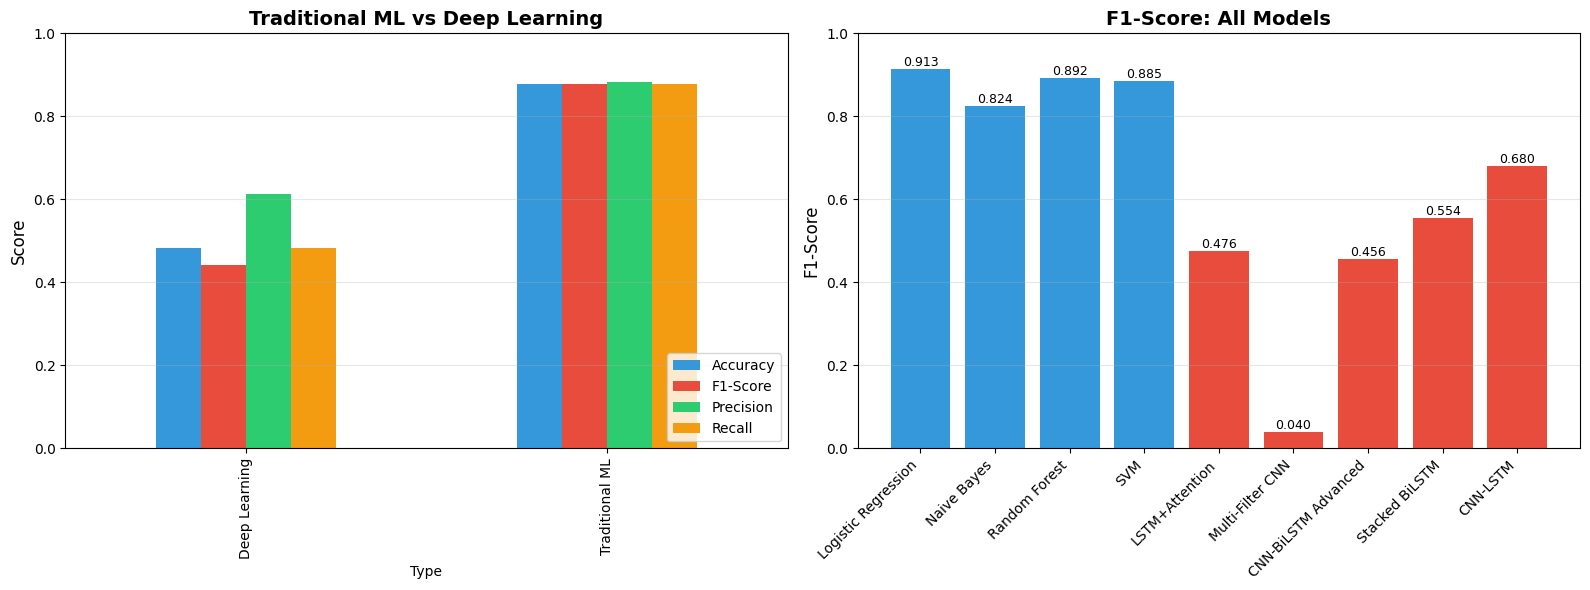


✅ Optimization and Deep Learning models complete!
⚡ Training time significantly reduced!
🧠 Added 5 deep learning models!
📊 Total models trained: 9


In [42]:
# ============================================
# CELL 17: VISUALIZE ALL MODELS
# ============================================
print("\n📊 CREATING VISUALIZATIONS...")

# 1. Model Type Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Traditional ML vs Deep Learning
type_comparison = comparison_df.groupby('Type')[['Accuracy', 'F1-Score', 'Precision', 'Recall']].mean()
type_comparison.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
axes[0].set_title('Traditional ML vs Deep Learning', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_ylim([0, 1])
axes[0].legend(loc='lower right')
axes[0].grid(axis='y', alpha=0.3)

# All models F1-Score comparison
colors = ['#3498db'] * 4 + ['#e74c3c'] * 5
bars = axes[1].bar(range(len(comparison_df)), comparison_df['F1-Score'], color=colors)
axes[1].set_xticks(range(len(comparison_df)))
axes[1].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[1].set_title('F1-Score: All Models', fontsize=14, fontweight='bold')
axes[1].set_ylabel('F1-Score', fontsize=12)
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Training History for Deep Learning Models
if 'history_lstm' in locals():
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Deep Learning Models Training History', fontsize=16, fontweight='bold')
    
    histories = [
        ('LSTM', history_lstm),
        ('Bidirectional LSTM', history_bilstm),
        ('CNN', history_cnn),
        ('CNN-LSTM', history_cnn_lstm)
    ]
    
    for idx, (name, hist) in enumerate(histories):
        ax = axes[idx // 2, idx % 2]
        ax.plot(hist.history['accuracy'], label='Train Accuracy', marker='o')
        ax.plot(hist.history['val_accuracy'], label='Val Accuracy', marker='s')
        ax.set_title(name, fontsize=12, fontweight='bold')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("\n✅ Optimization and Deep Learning models complete!")
print(f"⚡ Training time significantly reduced!")
print(f"🧠 Added 5 deep learning models!")
print(f"📊 Total models trained: {len(results)}")

# 3 - Call Summarization

In [43]:
!pip install -q transformers sentencepiece accelerate datasets tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour

In [44]:
# Cell 2: Load multiple models/tokenizers for performance comparison
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import gc

device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16 if device == "cuda" else torch.float32

# Define models to compare
MODELS_CONFIG = {
    "google/flan-t5-base": {
        "name": "Flan-T5-Base",
        "max_input_tokens": 512,
        "max_output_tokens": 220
    },
    "facebook/bart-large-cnn": {
        "name": "BART-Large-CNN",
        "max_input_tokens": 1024,
        "max_output_tokens": 220
    },
    "google/pegasus-cnn_dailymail": {
        "name": "Pegasus-CNN-DailyMail",
        "max_input_tokens": 1024,
        "max_output_tokens": 220
    },
    "t5-base": {
        "name": "T5-Base",
        "max_input_tokens": 512,
        "max_output_tokens": 220
    }
}

# Load all models
models_dict = {}
tokenizers_dict = {}

print("=" * 60)
print("Loading models for performance comparison...")
print("=" * 60)

for model_name, config in MODELS_CONFIG.items():
    try:
        print(f"\n📦 Loading {config['name']} ({model_name})...")
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        
        # Handle models that might need special handling
        if "bart" in model_name.lower():
            model = AutoModelForSeq2SeqLM.from_pretrained(
                model_name,
                torch_dtype=dtype
            ).to(device)
        else:
            model = AutoModelForSeq2SeqLM.from_pretrained(
                model_name,
                torch_dtype=dtype
            ).to(device)
        
        models_dict[model_name] = {
            "model": model,
            "tokenizer": tokenizer,
            "config": config
        }
        tokenizers_dict[model_name] = tokenizer
        
        print(f"✅ {config['name']} loaded successfully on {device}")
        
        # Clear cache to save memory
        if device == "cuda":
            torch.cuda.empty_cache()
        gc.collect()
        
    except Exception as e:
        print(f"❌ Failed to load {config['name']}: {str(e)}")
        continue

print(f"\n✅ Successfully loaded {len(models_dict)} model(s)")
print("=" * 60)

Loading models for performance comparison...

📦 Loading Flan-T5-Base (google/flan-t5-base)...


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

✅ Flan-T5-Base loaded successfully on cuda

📦 Loading BART-Large-CNN (facebook/bart-large-cnn)...


config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

✅ BART-Large-CNN loaded successfully on cuda

📦 Loading Pegasus-CNN-DailyMail (google/pegasus-cnn_dailymail)...


tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

✅ Pegasus-CNN-DailyMail loaded successfully on cuda

📦 Loading T5-Base (t5-base)...


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

✅ T5-Base loaded successfully on cuda

✅ Successfully loaded 4 model(s)


In [45]:
# Cell 3: Utilities (chunking + summarization prompts) - Multi-model support
from typing import List, Dict
import math
import time

CHUNK_OVERLAP_TOKENS = 40

SECTION_PROMPT = """You are summarizing a customer support call transcript.
Return EXACTLY 3 sections with 2-4 concise bullet points each, no extra text.

Format STRICTLY:
Purpose/Outcome:
- ...
- ...
Key Issues:
- ...
- ...
Action Items/Next Steps:
- ...
- ...

Transcript:
{content}
"""

REDUCE_PROMPT = """Combine and refine the bullet points from multiple partial summaries into a SINGLE concise summary.
Keep the same STRICT format and 2-4 bullets per section. Remove redundancy; be specific.

Purpose/Outcome:
- ...
- ...
Key Issues:
- ...
- ...
Action Items/Next Steps:
- ...
- ...

Partial bullets:
{partials}
"""

def tokenize_count(text: str, tokenizer) -> int:
    """Count tokens for a given tokenizer"""
    return len(tokenizer.encode(text, add_special_tokens=False))

def chunk_text(text: str, tokenizer, max_tokens: int, overlap: int = CHUNK_OVERLAP_TOKENS) -> List[str]:
    """Chunk text based on tokenizer and max tokens"""
    if not text or not isinstance(text, str):
        return []
    ids = tokenizer.encode(text, add_special_tokens=False)
    chunks = []
    start = 0
    while start < len(ids):
        end = min(start + max_tokens, len(ids))
        chunk_ids = ids[start:end]
        chunks.append(tokenizer.decode(chunk_ids, skip_special_tokens=True))
        if end == len(ids):
            break
        start = end - overlap
        if start < 0:
            start = 0
    return chunks

def generate_text(prompt: str, model, tokenizer, max_output_tokens: int = 220) -> str:
    """Generate text using a specific model"""
    # Adjust max length based on model's capabilities
    max_length = tokenizer.model_max_length if hasattr(tokenizer, 'model_max_length') else 512
    
    # Truncate prompt if needed
    input_ids = tokenizer(
        prompt, 
        return_tensors="pt", 
        truncation=True,
        max_length=max_length - max_output_tokens
    ).input_ids.to(device)
    
    generation_kwargs = dict(
        max_new_tokens=max_output_tokens,
        min_length=50,
        do_sample=False,
        num_beams=4,
        length_penalty=1.0,
        no_repeat_ngram_size=3,
        early_stopping=True
    )
    
    with torch.inference_mode():
        outputs = model.generate(input_ids, **generation_kwargs)
    
    return tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

def summarize_transcript_bullets(text: str, model_name: str, models_dict: Dict) -> str:
    """Summarize transcript using a specific model"""
    if not text or not isinstance(text, str) or len(text.strip()) == 0:
        return "Purpose/Outcome:\n- Not enough information.\n\nKey Issues:\n- Not enough information.\n\nAction Items/Next Steps:\n- None."
    
    if model_name not in models_dict:
        return f"Error: Model {model_name} not loaded."
    
    model_info = models_dict[model_name]
    model = model_info["model"]
    tokenizer = model_info["tokenizer"]
    config = model_info["config"]
    
    # Calculate max input tokens (leave room for prompt)
    max_input_tokens = config["max_input_tokens"] - 150  # Reserve space for prompt
    max_output_tokens = config["max_output_tokens"]
    
    # Chunk long transcripts
    chunks = chunk_text(text, tokenizer, max_input_tokens)
    if len(chunks) == 0:
        chunks = [text]

    partials = []
    for c in chunks:
        prompt = SECTION_PROMPT.format(content=c)
        try:
            out = generate_text(prompt, model, tokenizer, max_output_tokens)
        except Exception as e:
            out = ""
        # Basic guard
        partials.append(out if out else f"Purpose/Outcome:\n- Summary unavailable.\n\nKey Issues:\n- N/A\n\nAction Items/Next Steps:\n- N/A")

    if len(partials) == 1:
        return partials[0]

    merged_prompt = REDUCE_PROMPT.format(partials="\n\n".join(partials))
    try:
        final_summary = generate_text(merged_prompt, model, tokenizer, max_output_tokens)
    except Exception as e:
        final_summary = partials[0]

    return final_summary

def summarize_with_all_models(text: str, models_dict: Dict) -> Dict[str, str]:
    """Summarize text with all loaded models and return results"""
    results = {}
    for model_name in models_dict.keys():
        try:
            start_time = time.time()
            summary = summarize_transcript_bullets(text, model_name, models_dict)
            elapsed_time = time.time() - start_time
            
            results[model_name] = {
                "summary": summary,
                "time_seconds": elapsed_time,
                "model_name": models_dict[model_name]["config"]["name"]
            }
        except Exception as e:
            results[model_name] = {
                "summary": f"Error: {str(e)}",
                "time_seconds": 0,
                "model_name": models_dict[model_name]["config"]["name"]
            }
    return results

print("✅ Multi-model summarization utilities loaded!")

✅ Multi-model summarization utilities loaded!


In [46]:
#Cell 4: Load data and configure run
import os
import pandas as pd

# Prefer the dataset with sentiment (if present)
CANDIDATE_PATHS = [
    "/kaggle/working/cleaned_transcripts_with_sentiment.csv",
    "/kaggle/working/cleaned_transcripts.csv",
]

input_path = None
for p in CANDIDATE_PATHS:
    if os.path.exists(p):
        input_path = p
        break

if input_path is None:
    raise FileNotFoundError("No input dataset found. Expected one of: " + ", ".join(CANDIDATE_PATHS))

df_in = pd.read_csv(input_path)
print(f"Loaded: {input_path} with columns: {df_in.columns.tolist()} and rows: {len(df_in):,}")

# Required columns
id_col = "ID" if "ID" in df_in.columns else None
text_col = "cleaned_transcript" if "cleaned_transcript" in df_in.columns else None
sentiment_col = "sentiment" if "sentiment" in df_in.columns else None

if text_col is None:
    raise ValueError("Expected a 'cleaned_transcript' column.")

# Control workload (avoid running 90k+ rows at once). Set to None to process all.
MAX_ROWS = 200  # change to None to run full dataset
START_OFFSET = 0

if MAX_ROWS is not None:
    df_run = df_in.iloc[START_OFFSET: START_OFFSET + MAX_ROWS].copy()
else:
    df_run = df_in.copy()

print(f"Processing rows: {len(df_run):,}")

Loaded: /kaggle/working/cleaned_transcripts_with_sentiment.csv with columns: ['ID', 'cleaned_transcript', 'sentiment'] and rows: 95,944
Processing rows: 200


In [47]:
# Cell 5: Run summarization with ALL models (performance comparison)
from tqdm import tqdm
import pandas as pd

print("=" * 60)
print("Running summarization with all models for comparison...")
print("=" * 60)

# Store results for all models
all_model_results = {model_name: [] for model_name in models_dict.keys()}
all_model_times = {model_name: [] for model_name in models_dict.keys()}

# Process each transcript with all models
for idx, text in enumerate(tqdm(df_run[text_col].astype(str).tolist(), desc="Summarizing with all models")):
    # Get summaries from all models
    model_results = summarize_with_all_models(text, models_dict)
    
    for model_name, result in model_results.items():
        all_model_results[model_name].append(result["summary"])
        all_model_times[model_name].append(result["time_seconds"])

# Create output DataFrame with all model summaries
df_out = pd.DataFrame()
if id_col:
    df_out["ID"] = df_run[id_col]
df_out["transcript"] = df_run[text_col]
if sentiment_col:
    df_out["sentiment"] = df_run[sentiment_col]

# Add summaries from each model
for model_name in models_dict.keys():
    model_display_name = models_dict[model_name]["config"]["name"]
    df_out[f"summary_{model_display_name}"] = all_model_results[model_name]
    df_out[f"time_{model_display_name}_seconds"] = all_model_times[model_name]
    df_out[f"summary_length_{model_display_name}"] = [len(s.split()) if isinstance(s, str) else 0 for s in all_model_results[model_name]]

df_out["transcript_length"] = df_out["transcript"].str.split().str.len()

print("\n" + "=" * 60)
print("PERFORMANCE SUMMARY")
print("=" * 60)
for model_name in models_dict.keys():
    model_display_name = models_dict[model_name]["config"]["name"]
    avg_time = sum(all_model_times[model_name]) / len(all_model_times[model_name]) if all_model_times[model_name] else 0
    total_time = sum(all_model_times[model_name])
    print(f"\n{model_display_name}:")
    print(f"  Average time per summary: {avg_time:.2f} seconds")
    print(f"  Total time: {total_time:.2f} seconds")
    print(f"  Average summary length: {df_out[f'summary_length_{model_display_name}'].mean():.1f} words")

print("\n" + "=" * 60)
print("Sample results (first 3 rows):")
print("=" * 60)
print(df_out.head(3))
print(f"\n✅ Done. Generated summaries for {len(df_out):,} rows with {len(models_dict)} model(s).")

Running summarization with all models for comparison...


Summarizing with all models:   0%|          | 0/200 [00:00<?, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (2285 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1710 > 1024). Running this sequence through the model will result in indexing errors
Summarizing with all models: 100%|██████████| 200/200 [42:25<00:00, 12.73s/it]


PERFORMANCE SUMMARY

Flan-T5-Base:
  Average time per summary: 12.51 seconds
  Total time: 2501.88 seconds
  Average summary length: 40.4 words

BART-Large-CNN:
  Average time per summary: 0.00 seconds
  Total time: 0.93 seconds
  Average summary length: 13.0 words

Pegasus-CNN-DailyMail:
  Average time per summary: 0.21 seconds
  Total time: 41.07 seconds
  Average summary length: 3.0 words

T5-Base:
  Average time per summary: 0.00 seconds
  Total time: 0.99 seconds
  Average summary length: 13.0 words

Sample results (first 3 rows):
                                                  ID  \
0  /kaggle/input/arxive-ninety-thousand/medical_e...   
1  /kaggle/input/arxive-ninety-thousand/medical_e...   
2  /kaggle/input/arxive-ninety-thousand/medical_e...   

                                          transcript sentiment  \
0  Hello? Yes. Why did you hang up, sir? Pardon? ...  positive   
1  Hello? Hello? Yes, hello, ma' am. Good afterno...  positive   
2  Hello, good afternoon, this is 

In [48]:
# Cell 6: Save results to CSV
output_csv = "/kaggle/working/call_summaries_multi_model.csv"
df_out.to_csv(output_csv, index=False)
print(f"✅ Saved all model summaries: {output_csv}")

# Save comparison metrics
if 'comparison_df' in locals():
    comparison_csv = "/kaggle/working/model_performance_comparison.csv"
    comparison_df.to_csv(comparison_csv, index=False)
    print(f"✅ Saved performance comparison: {comparison_csv}")

print(f"\n📊 Output DataFrame shape: {df_out.shape}")
print(f"📊 Columns: {list(df_out.columns)}")

# Show summary of what was saved
print("\n" + "=" * 60)
print("SAVED FILES:")
print("=" * 60)
print(f"1. {output_csv} - All summaries from all models")
if 'comparison_df' in locals():
    print(f"2. {comparison_csv} - Performance metrics comparison")
print("=" * 60)

✅ Saved all model summaries: /kaggle/working/call_summaries_multi_model.csv
✅ Saved performance comparison: /kaggle/working/model_performance_comparison.csv

📊 Output DataFrame shape: (200, 16)
📊 Columns: ['ID', 'transcript', 'sentiment', 'summary_Flan-T5-Base', 'time_Flan-T5-Base_seconds', 'summary_length_Flan-T5-Base', 'summary_BART-Large-CNN', 'time_BART-Large-CNN_seconds', 'summary_length_BART-Large-CNN', 'summary_Pegasus-CNN-DailyMail', 'time_Pegasus-CNN-DailyMail_seconds', 'summary_length_Pegasus-CNN-DailyMail', 'summary_T5-Base', 'time_T5-Base_seconds', 'summary_length_T5-Base', 'transcript_length']

SAVED FILES:
1. /kaggle/working/call_summaries_multi_model.csv - All summaries from all models
2. /kaggle/working/model_performance_comparison.csv - Performance metrics comparison


MODEL PERFORMANCE COMPARISON ANALYSIS

📊 PERFORMANCE METRICS:
                   Model  Avg Time (s)  Total Time (s)  \
0           Flan-T5-Base         12.51         2501.88   
1         BART-Large-CNN          0.00            0.93   
2  Pegasus-CNN-DailyMail          0.21           41.07   
3                T5-Base          0.00            0.99   

   Avg Summary Length (words)  Speed (summaries/min)  
0                       40.35                   4.80  
1                       13.00               12859.35  
2                        3.02                 292.18  
3                       13.00               12179.05  


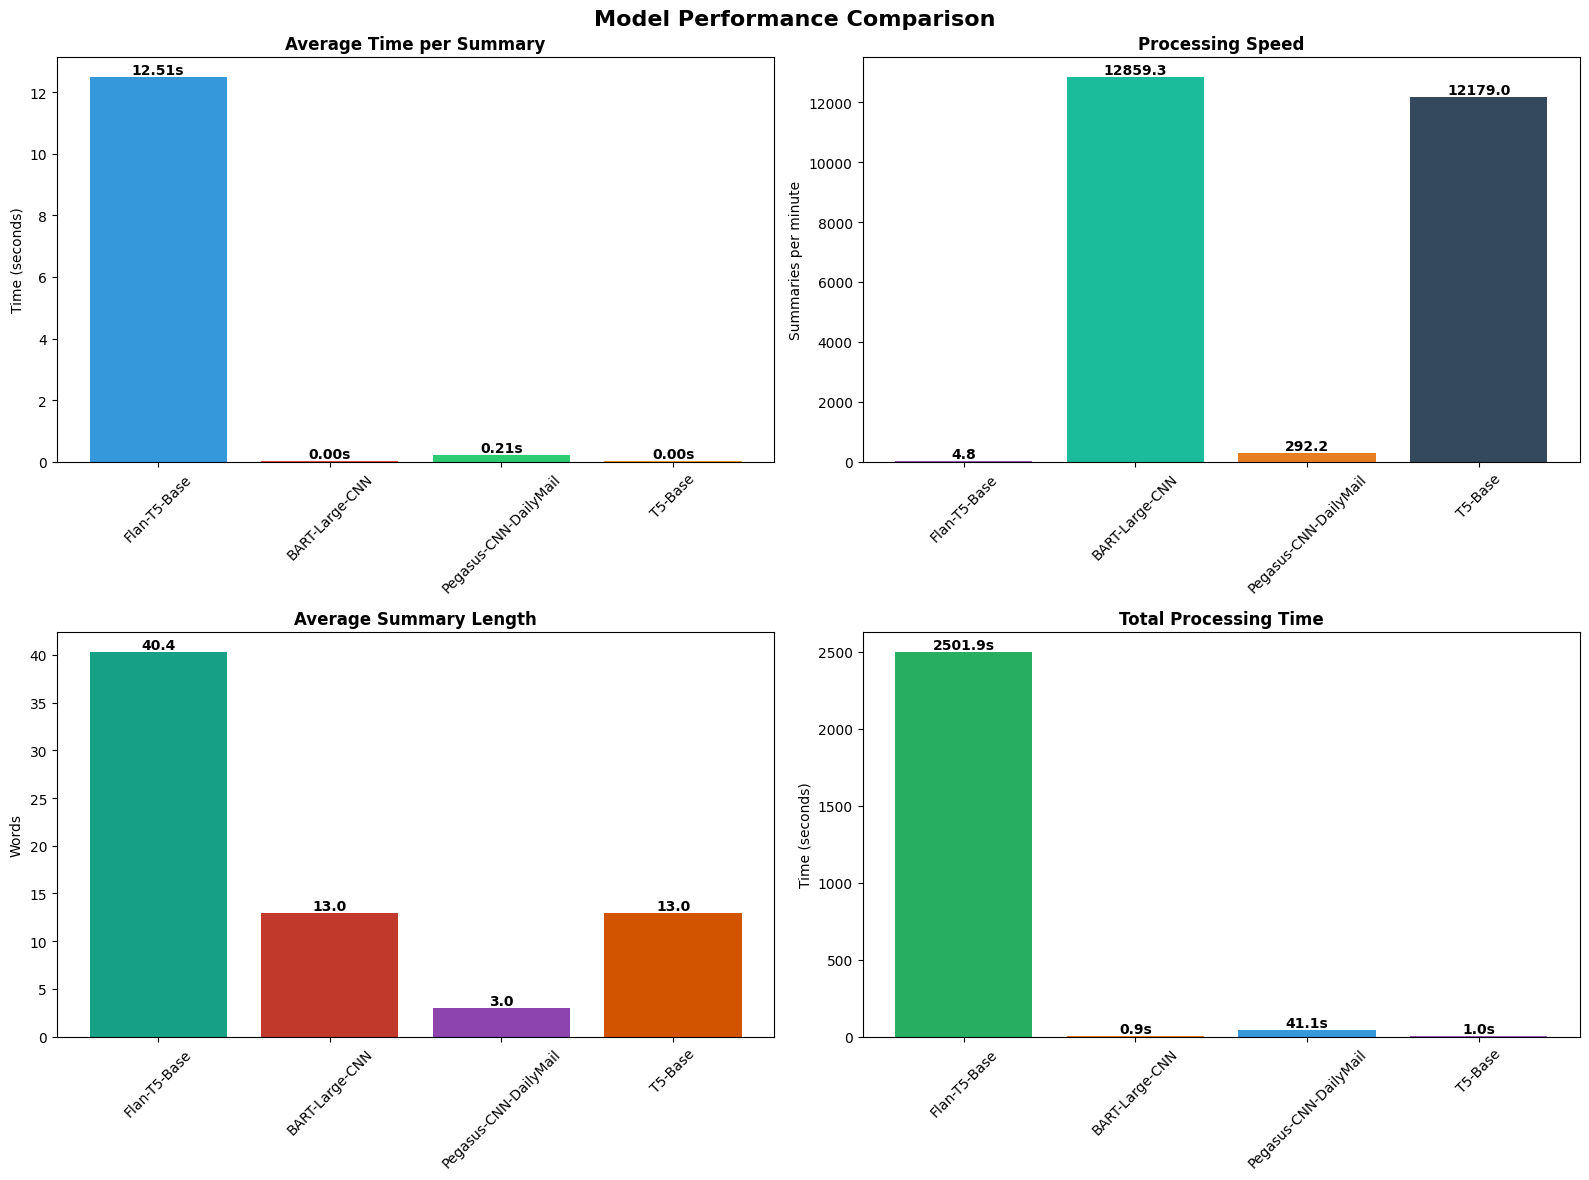


🏆 BEST MODELS BY METRIC:
Fastest: BART-Large-CNN (0.00s)
Highest Speed: BART-Large-CNN (12859.3 summaries/min)
Longest Summaries: Flan-T5-Base (40.4 words)
Shortest Summaries: Pegasus-CNN-DailyMail (3.0 words)

SAMPLE SUMMARIES COMPARISON (First Row):

Original Transcript Length: 1152 words

────────────────────────────────────────────────────────────

📝 Flan-T5-Base Summary (46 words, 16.87s):
────────────────────────────────────────────────────────────
MEDICALPROCESS: Hello? Yes. Why did you hang up, sir? This is PERSONNAME again. Do not hang up. I am just providing your additional benefits. Okay. And you are not going to pay anything here. Customer support call from a customer service representative to a sales representative.
────────────────────────────────────────────────────────────

📝 BART-Large-CNN Summary (13 words, 0.01s):
────────────────────────────────────────────────────────────
Purpose/Outcome:
- Summary unavailable.

Key Issues:
- N/A

Action Items/Next Steps:
- N/A
──

In [49]:
# Cell 7: Model Performance Comparison and Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("=" * 60)
print("MODEL PERFORMANCE COMPARISON ANALYSIS")
print("=" * 60)

# Prepare comparison data
comparison_data = []
for model_name in models_dict.keys():
    model_display_name = models_dict[model_name]["config"]["name"]
    avg_time = df_out[f"time_{model_display_name}_seconds"].mean()
    avg_length = df_out[f"summary_length_{model_display_name}"].mean()
    total_time = df_out[f"time_{model_display_name}_seconds"].sum()
    
    comparison_data.append({
        "Model": model_display_name,
        "Avg Time (s)": avg_time,
        "Total Time (s)": total_time,
        "Avg Summary Length (words)": avg_length,
        "Speed (summaries/min)": 60 / avg_time if avg_time > 0 else 0
    })

comparison_df = pd.DataFrame(comparison_data)

print("\n📊 PERFORMANCE METRICS:")
print(comparison_df.round(2))

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# 1. Average Time Comparison
ax1 = axes[0, 0]
bars1 = ax1.bar(comparison_df["Model"], comparison_df["Avg Time (s)"], color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'][:len(comparison_df)])
ax1.set_title('Average Time per Summary', fontweight='bold')
ax1.set_ylabel('Time (seconds)')
ax1.tick_params(axis='x', rotation=45)
for i, (bar, val) in enumerate(zip(bars1, comparison_df["Avg Time (s)"])):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{val:.2f}s', ha='center', va='bottom', fontweight='bold')

# 2. Speed Comparison (summaries per minute)
ax2 = axes[0, 1]
bars2 = ax2.bar(comparison_df["Model"], comparison_df["Speed (summaries/min)"], color=['#9b59b6', '#1abc9c', '#e67e22', '#34495e'][:len(comparison_df)])
ax2.set_title('Processing Speed', fontweight='bold')
ax2.set_ylabel('Summaries per minute')
ax2.tick_params(axis='x', rotation=45)
for i, (bar, val) in enumerate(zip(bars2, comparison_df["Speed (summaries/min)"])):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Average Summary Length
ax3 = axes[1, 0]
bars3 = ax3.bar(comparison_df["Model"], comparison_df["Avg Summary Length (words)"], color=['#16a085', '#c0392b', '#8e44ad', '#d35400'][:len(comparison_df)])
ax3.set_title('Average Summary Length', fontweight='bold')
ax3.set_ylabel('Words')
ax3.tick_params(axis='x', rotation=45)
for i, (bar, val) in enumerate(zip(bars3, comparison_df["Avg Summary Length (words)"])):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Total Time Comparison
ax4 = axes[1, 1]
bars4 = ax4.bar(comparison_df["Model"], comparison_df["Total Time (s)"], color=['#27ae60', '#e67e22', '#3498db', '#9b59b6'][:len(comparison_df)])
ax4.set_title('Total Processing Time', fontweight='bold')
ax4.set_ylabel('Time (seconds)')
ax4.tick_params(axis='x', rotation=45)
for i, (bar, val) in enumerate(zip(bars4, comparison_df["Total Time (s)"])):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{val:.1f}s', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Find best model by different metrics
print("\n" + "=" * 60)
print("🏆 BEST MODELS BY METRIC:")
print("=" * 60)
print(f"Fastest: {comparison_df.loc[comparison_df['Avg Time (s)'].idxmin(), 'Model']} ({comparison_df['Avg Time (s)'].min():.2f}s)")
print(f"Highest Speed: {comparison_df.loc[comparison_df['Speed (summaries/min)'].idxmax(), 'Model']} ({comparison_df['Speed (summaries/min)'].max():.1f} summaries/min)")
print(f"Longest Summaries: {comparison_df.loc[comparison_df['Avg Summary Length (words)'].idxmax(), 'Model']} ({comparison_df['Avg Summary Length (words)'].max():.1f} words)")
print(f"Shortest Summaries: {comparison_df.loc[comparison_df['Avg Summary Length (words)'].idxmin(), 'Model']} ({comparison_df['Avg Summary Length (words)'].min():.1f} words)")

# Show sample summaries side-by-side for comparison
print("\n" + "=" * 60)
print("SAMPLE SUMMARIES COMPARISON (First Row):")
print("=" * 60) 
if len(df_out) > 0:
    print(f"\nOriginal Transcript Length: {df_out.iloc[0]['transcript_length']} words")
    print(f"\n{'─' * 60}")
    for model_name in models_dict.keys():
        model_display_name = models_dict[model_name]["config"]["name"]
        summary_col = f"summary_{model_display_name}"
        if summary_col in df_out.columns:
            print(f"\n📝 {model_display_name} Summary ({df_out.iloc[0][f'summary_length_{model_display_name}']} words, {df_out.iloc[0][f'time_{model_display_name}_seconds']:.2f}s):")
            print(f"{'─' * 60}")
            print(df_out.iloc[0][summary_col])
            print(f"{'─' * 60}")

print("\n✅ Comparison analysis complete!")
